# Species distribution

### Author: Brian Nhan Thien Chung (UCI NATURE Research Technician)

#### Created on: Saturday August 15, 2020 by Brian Nhan Thien Chung
#### Last edited on: Friday September 4, 2020 by Brian Nhan Thien Chung
This Jupyter Notebook was created to analyze the species distribution of photos from the wildlife cameras operated by UCI NATURE. This Jupyter Notebook will run through a spreadsheet titled "Camera_METADATA_UCI" that records photos from each camera and describes the species of animal(s) in each photo. This notebook will then produce proportions of each species observed from each camera. This data will be used to create a training set of photos to train a neural network that identifies the species observed from the cameras operated by UCI NATURE.

Note: this spreadsheet does not contain any empty photos. Every photo contains an animal or a human vehicle.

This notebook is divided into sections with each section having a unique purpose. Each section will also produce at least 1 product. Depending on the nature of the product, some will be exported while others will be saved in this notebook. The exported products will be in the same directory as this notebook and as the "Camera_METADATA_UCI.csv" file. The exported products consist of graphs (which can be opened using any image viewer) and csv files (text files that can be opened up using any spreadsheet programs such as Microsoft Excel or Google Sheets). The sections are:
#### Section 1
Processing "Camera_METADATA_UCI.csv" spreadsheet to prevent the double counting of duplicate entries of the same photo by the same camera taken on the same day. The data is exported as a new csv file titled "re-labeled animal photos.csv"
#### Section 2
Read in the new csv file and count the species observed for each camera. This section will produce the total number of photos taken by each camera and a 2-dimensional numpy array describing the counts and proportions of species observed for each camera. This section does not export any of its products, but the products will be used and then exported in the following sections.
#### Section 3
Plot the products from section 2 (counts and proportions of each species from each camera) as bar graphs for each camera. The graphs will be saved in the same directory as this book. When the original author produced these graphs, he then moved these graphs to a new folder he created in the directory that holds this spreadsheet.
#### Section 4
Sort each camera by the number of photos each camera takes and then export this information as a new csv file titled "Total photos from each camera.csv"

#### Edit dates
Saturday 8/15/2020 - Brian Nhan Thien Chung

Sunday 8/16/2020 - Brian Nhan Thien Chung

Monday 8/17/2020 - Brian Nhan Thien Chung

Thursday 8/20/2020 - Brian Nhan Thien Chung

Friday 8/21/2020 - Brian Nhan Thien Chung

Friday 8/28/2020 - Brian Nhan Thien Chung

Friday 9/4/2020 - Brian Nhan Thien Chung

In [58]:
import numpy as np
import matplotlib.pyplot as py
import pandas as pd

#this jupyter notebook was written using a dark theme. The dark theme is produced from
#the lines of code below. If future users wish to have the same theme, then
#the following lines of code installs the jupyterthemes module and sets the theme
#of this notebook to the monokai theme:
# !pip install jupyterthemes
# import jupyterthemes as jt
# !jt -t gruvboxd
# from jupyterthemes import jtplot
# jtplot.style(theme = "gruvboxd")

#the documentation of the jupyterthemes module can be referenced from this link:
#https://github.com/dunovank/jupyter-themes

#For uploading onto GitHub, the author will revert the theme back to the default theme
#of Jupyter Notebooks with the following line:
# !jt -r

In [59]:
%autosave 15

Autosaving every 15 seconds


### Section 1

In [60]:
photoEntries = pd.read_csv("Camera_METADATA_UCI.csv")
lowerCaseSpecies = photoEntries["Species"].str.lower()
lowerCaseSpecies[lowerCaseSpecies == "s ke"] = "snake"
print(lowerCaseSpecies[lowerCaseSpecies == "snake"])
photoEntries["Species"] = lowerCaseSpecies
print(photoEntries)

9149    snake
9150    snake
9151    snake
Name: Species, dtype: object
        Location LocCode ImageNumber  ImageQuality Species  NumIndividuals  \
0     Anteater_1      AT    IMG_0025           1.0   human               1   
1     Anteater_1      AT    IMG_0028           1.0   human               1   
2     Anteater_1      AT    IMG_0031           1.0   human               1   
3     Anteater_1      AT    IMG_0034           1.0   human               1   
4     Anteater_1      AT    IMG_0039           1.0   human               1   
...          ...     ...         ...           ...     ...             ...   
9894  SDC_Hist_1      HB    IMG_0906           3.0    bird               1   
9895  SDC_Hist_1      HB    IMG_0907           3.0    bird               1   
9896  SDC_Hist_1      HB    IMG_0908           3.0    bird               1   
9897  SDC_Hist_1      HB    IMG_0909           3.0    bird               2   
9898  SDC_Hist_1      HB    IMG_0910           3.0    bird             

Reformatting time and date

In [61]:
date = photoEntries["Date"]
print(date)
print('\n')

timeList = photoEntries["Time"].tolist()
print(timeList[:5])
print('\n')
for index in range(len(timeList)):
    if "PM" in timeList[index]:
        splittedTime = timeList[index].split(" ")
        formattedTime = splittedTime[0] + ":00"
        timeList[index] = formattedTime
        print(timeList[index])
print('\n')
for time in timeList:
    if "PM" in time:
        print(time)
time = pd.Series(timeList)
photoEntries["Time"] = time
print(time)
print('\n')
datetime = pd.to_datetime(date + " " + time)
print(datetime)
print('\n')
photoEntries.insert(8, "datetime", datetime)
# date = pd.to_datetime(arg = date, errors = "raise")
# photoEntries["Date"] = date
# print(date)
print('\n')
print(photoEntries)

0       10/11/2019
1       10/11/2019
2       10/11/2019
3       10/11/2019
4       10/11/2019
           ...    
9894      4/3/2020
9895      4/3/2020
9896      4/3/2020
9897      4/3/2020
9898      4/3/2020
Name: Date, Length: 9899, dtype: object


['14:25:00', '14:55:00', '18:24:00', '18:28:00', '18:37:00']


15:35:00
16:23:00
17:49:00
21:08:00
13:10:00
14:26:00
16:34:00
17:38:00
14:10:00
14:21:00
17:38:00
18:30:00
14:00:00
14:07:00
14:13:00
15:39:00
15:46:00
16:29:00
17:14:00
20:52:00


0       14:25:00
1       14:55:00
2       18:24:00
3       18:28:00
4       18:37:00
          ...   
9894    12:37:00
9895    12:38:00
9896    12:38:00
9897    12:38:00
9898    12:39:00
Length: 9899, dtype: object


0      2019-10-11 14:25:00
1      2019-10-11 14:55:00
2      2019-10-11 18:24:00
3      2019-10-11 18:28:00
4      2019-10-11 18:37:00
               ...        
9894   2020-04-03 12:37:00
9895   2020-04-03 12:38:00
9896   2020-04-03 12:38:00
9897   2020-04-03 12:38:00
9898   2020-04-03

In [62]:
photoEntriesList = photoEntries.values.tolist()
for entry in photoEntriesList:
    print(entry)

['Anteater_1', 'AT', 'IMG_0025', 1.0, 'human', 1, '10/11/2019', '14:25:00', Timestamp('2019-10-11 14:25:00'), 'Orientation one:close to the road']
['Anteater_1', 'AT', 'IMG_0028', 1.0, 'human', 1, '10/11/2019', '14:55:00', Timestamp('2019-10-11 14:55:00'), ' ']
['Anteater_1', 'AT', 'IMG_0031', 1.0, 'human', 1, '10/11/2019', '18:24:00', Timestamp('2019-10-11 18:24:00'), ' ']
['Anteater_1', 'AT', 'IMG_0034', 1.0, 'human', 1, '10/11/2019', '18:28:00', Timestamp('2019-10-11 18:28:00'), ' ']
['Anteater_1', 'AT', 'IMG_0039', 1.0, 'human', 1, '10/11/2019', '18:37:00', Timestamp('2019-10-11 18:37:00'), ' ']
['Anteater_1', 'AT', 'IMG_0041', 1.0, 'domestic dog', 1, '10/11/2019', '18:38:00', Timestamp('2019-10-11 18:38:00'), ' ']
['Anteater_1', 'AT', 'IMG_0041', 1.0, 'human', 1, '10/11/2019', '18:38:00', Timestamp('2019-10-11 18:38:00'), ' ']
['Anteater_1', 'AT', 'IMG_0043', 2.0, 'human', 1, '10/11/2019', '18:40:00', Timestamp('2019-10-11 18:40:00'), 'only leg']
['Anteater_1', 'AT', 'IMG_0047', 1

['Anteater_2', 'AT', 'IMG_2120', 3.0, 'rabbit', 2, '12/28/2019', '19:15:00', Timestamp('2019-12-28 19:15:00'), ' ']
['Anteater_2', 'AT', 'IMG_2123', 3.0, 'coyote', 1, '12/28/2019', '22:42:00', Timestamp('2019-12-28 22:42:00'), ' ']
['Anteater_2', 'AT', 'IMG_2153', 2.0, 'rabbit', 1, '12/29/2019', '18:07:00', Timestamp('2019-12-29 18:07:00'), ' ']
['Anteater_2', 'AT', 'IMG_2155', 2.0, 'rabbit', 2, '12/29/2019', '18:07:00', Timestamp('2019-12-29 18:07:00'), ' ']
['Anteater_2', 'AT', 'IMG_2156', 3.0, 'human', 1, '12/29/2019', '18:13:00', Timestamp('2019-12-29 18:13:00'), ' ']
['Anteater_2', 'AT', 'IMG_2159', 3.0, 'rabbit', 1, '12/29/2019', '18:18:00', Timestamp('2019-12-29 18:18:00'), ' ']
['Anteater_2', 'AT', 'IMG_2162', 2.0, 'rabbit', 2, '12/29/2019', '18:19:00', Timestamp('2019-12-29 18:19:00'), ' ']
['Anteater_2', 'AT', 'IMG_2166', 2.0, 'rabbit', 2, '12/29/2019', '18:24:00', Timestamp('2019-12-29 18:24:00'), ' ']
['Anteater_2', 'AT', 'IMG_2168', 3.0, 'rabbit', 1, '12/29/2019', '18:49:0

['Anteater_2', 'AT', 'IMG_1089', 1.0, 'rabbit', 2, '1/23/2020', '17:55:00', Timestamp('2020-01-23 17:55:00'), ' ']
['Anteater_2', 'AT', 'IMG_1092', 2.0, 'rabbit', 2, '1/23/2020', '18:00:00', Timestamp('2020-01-23 18:00:00'), ' ']
['Anteater_2', 'AT', 'IMG_1095', 2.0, 'rabbit', 1, '1/23/2020', '18:31:00', Timestamp('2020-01-23 18:31:00'), ' ']
['Anteater_2', 'AT', 'IMG_1098', 3.0, 'rabbit', 1, '1/23/2020', '18:40:00', Timestamp('2020-01-23 18:40:00'), ' ']
['Anteater_2', 'AT', 'IMG_1101', 3.0, 'unknown', 1, '1/23/2020', '18:53:00', Timestamp('2020-01-23 18:53:00'), ' ']
['Anteater_2', 'AT', 'IMG_1104', 2.0, 'rabbit', 1, '1/23/2020', '19:06:00', Timestamp('2020-01-23 19:06:00'), ' ']
['Anteater_2', 'AT', 'IMG_1107', 3.0, 'unknown', 1, '1/23/2020', '19:13:00', Timestamp('2020-01-23 19:13:00'), ' ']
['Anteater_2', 'AT', 'IMG_1110', 1.0, 'rabbit', 1, '1/23/2020', '19:14:00', Timestamp('2020-01-23 19:14:00'), ' ']
['Anteater_2', 'AT', 'IMG_1113', 2.0, 'rabbit', 1, '1/23/2020', '19:16:00', Ti

['Anteater_2', 'AT', 'IMG_2245', 1.0, 'human', 1, '3/24/2020', '10:18:00', Timestamp('2020-03-24 10:18:00'), ' ']
['Anteater_2', 'AT', 'IMG_2245', 1.0, 'human', 1, '3/24/2020', '11:01:00', Timestamp('2020-03-24 11:01:00'), ' ']
['Anteater_2', 'AT', 'IMG_2254', 1.0, 'human', 2, '3/24/2020', '12:11:00', Timestamp('2020-03-24 12:11:00'), ' ']
['Anteater_2', 'AT', 'IMG_2260', 1.0, 'human', 1, '3/24/2020', '12:45:00', Timestamp('2020-03-24 12:45:00'), ' ']
['Anteater_2', 'AT', 'IMG_2266', 1.0, 'human', 2, '3/24/2020', '13:03:00', Timestamp('2020-03-24 13:03:00'), ' ']
['Anteater_2', 'AT', 'IMG_2275', 1.0, 'human', 1, '3/24/2020', '13:26:00', Timestamp('2020-03-24 13:26:00'), ' ']
['Anteater_2', 'AT', 'IMG_2278', 1.0, 'human', 2, '3/24/2020', '10:36:00', Timestamp('2020-03-24 10:36:00'), ' ']
['Anteater_2', 'AT', 'IMG_2285', 1.0, 'human', 2, '3/24/2020', '14:03:00', Timestamp('2020-03-24 14:03:00'), ' ']
['Anteater_2', 'AT', 'IMG_2286', 1.0, 'domestic dog', 1, '3/24/2020', '14:03:00', Timest

['Coyotetrail', 'CT', 'IMG_0370', 1.0, 'human', 1, '1/25 2020', '15:43:00', Timestamp('2020-01-25 15:43:00'), 'bike']
['Coyotetrail', 'CT', 'IMG_0375', 1.0, 'human', 1, '1/25 2020', '15:51:00', Timestamp('2020-01-25 15:51:00'), ' ']
['Coyotetrail', 'CT', 'IMG_0375', 1.0, 'domestic dog', 1, '1/25 2020', '15:51:00', Timestamp('2020-01-25 15:51:00'), ' ']
['Coyotetrail', 'CT', 'IMG_0377', 1.0, 'human', 2, '1/25 2020', '15:53:00', Timestamp('2020-01-25 15:53:00'), 'bike']
['Coyotetrail', 'CT', 'IMG_0381', 1.0, 'human', 3, '1/25 2020', '15:54:00', Timestamp('2020-01-25 15:54:00'), 'bike']
['Coyotetrail', 'CT', 'IMG_0382', 1.0, 'human', 1, '1/25 2020', '16:07:00', Timestamp('2020-01-25 16:07:00'), 'bike']
['Coyotetrail', 'CT', 'IMG_0386', 1.0, 'human', 1, '1/25 2020', '16:27:00', Timestamp('2020-01-25 16:27:00'), ' ']
['Coyotetrail', 'CT', 'IMG_0390', 1.0, 'human', 1, '1/25 2020', '16:53:00', Timestamp('2020-01-25 16:53:00'), ' ']
['Coyotetrail', 'CT', 'IMG_0391', 1.0, 'human', 1, '1/25 2020

['Coyotetrail', 'CT', 'IMG_1717', 1.0, 'human', 1, '2/14/2020', '8:54:00', Timestamp('2020-02-14 08:54:00'), ' ']
['Coyotetrail', 'CT', 'IMG_1717', 1.0, 'vehicle', 1, '2/14/2020', '8:54:00', Timestamp('2020-02-14 08:54:00'), ' ']
['Coyotetrail', 'CT', 'IMG_1717', 1.0, 'human', 1, '2/14/2020', '8:54:00', Timestamp('2020-02-14 08:54:00'), 'bike']
['Coyotetrail', 'CT', 'IMG_1723', 1.0, 'human', 1, '2/14/2020', '9:00:00', Timestamp('2020-02-14 09:00:00'), 'bike']
['Coyotetrail', 'CT', 'IMG_1730', 1.0, 'human', 1, '2/14/2020', '9:03:00', Timestamp('2020-02-14 09:03:00'), ' ']
['Coyotetrail', 'CT', 'IMG_1734', 1.0, 'human', 1, '2/14/2020', '9:11:00', Timestamp('2020-02-14 09:11:00'), ' ']
['Coyotetrail', 'CT', 'IMG_1734', 1.0, 'domestic dog', 1, '2/14/2020', '9:11:00', Timestamp('2020-02-14 09:11:00'), ' ']
['Coyotetrail', 'CT', 'IMG_1736', 1.0, 'human', 1, '2/14/2020', '9:14:00', Timestamp('2020-02-14 09:14:00'), ' ']
['Coyotetrail', 'CT', 'IMG_1742', 1.0, 'human', 1, '2/14/2020', '9:29:00'

['Coyotetrail', 'CT', 'IMG_2814', 1.0, 'human', 1, '2/18/2020', '9:24:00', Timestamp('2020-02-18 09:24:00'), ' ']
['Coyotetrail', 'CT', 'IMG_2817', 1.0, 'human', 1, '2/18/2020', '9:27:00', Timestamp('2020-02-18 09:27:00'), ' ']
['Coyotetrail', 'CT', 'IMG_2819', 1.0, 'human', 1, '2/18/2020', '9:31:00', Timestamp('2020-02-18 09:31:00'), ' ']
['Coyotetrail', 'CT', 'IMG_2821', 1.0, 'human', 1, '2/18/2020', '9:36:00', Timestamp('2020-02-18 09:36:00'), 'bike']
['Coyotetrail', 'CT', 'IMG_2826', 1.0, 'human', 1, '2/18/2020', '9:37:00', Timestamp('2020-02-18 09:37:00'), ' ']
['Coyotetrail', 'CT', 'IMG_2826', 1.0, 'domestic dog', 1, '2/18/2020', '9:37:00', Timestamp('2020-02-18 09:37:00'), ' ']
['Coyotetrail', 'CT', 'IMG_2830', 1.0, 'human', 1, '2/18/2020', '10:01:00', Timestamp('2020-02-18 10:01:00'), 'bike']
['Coyotetrail', 'CT', 'IMG_2838', 1.0, 'human', 1, '2/18/2020', '10:23:00', Timestamp('2020-02-18 10:23:00'), ' ']
['Coyotetrail', 'CT', 'IMG_2838', 1.0, 'domestic dog', 1, '2/18/2020', '1

['MacArthurBridge', 'MB', 'RCNX1078', 1.0, 'human', 1, '3/31/2020', '11:22:31', Timestamp('2020-03-31 11:22:31'), ' ']
['MacArthurBridge', 'MB', 'RCNX1081', 1.0, 'human', 1, '3/31/2020', '11:48:45', Timestamp('2020-03-31 11:48:45'), ' ']
['MacArthurBridge', 'MB', 'RCNX1084', 1.0, 'human', 1, '3/31/2020', '11:57:39', Timestamp('2020-03-31 11:57:39'), ' ']
['MacArthurBridge', 'MB', 'RCNX1087', 1.0, 'human', 1, '3/31/2020', '12:17:50', Timestamp('2020-03-31 12:17:50'), ' ']
['MacArthurBridge', 'MB', 'RCNX1087', 1.0, 'domestic dog', 1, '3/31/2020', '12:17:50', Timestamp('2020-03-31 12:17:50'), ' ']
['MacArthurBridge', 'MB', 'RCNX1090', 1.0, 'human', 1, '3/31/2020', '12:25:12', Timestamp('2020-03-31 12:25:12'), ' ']
['MacArthurBridge', 'MB', 'RCNX1093', 1.0, 'human', 1, '3/31/2020', '12:28:12', Timestamp('2020-03-31 12:28:12'), ' ']
['MacArthurBridge', 'MB', 'RCNX1096', 1.0, 'human', 1, '3/31/2020', '13:48:57', Timestamp('2020-03-31 13:48:57'), ' ']
['MacArthurBridge', 'MB', 'RCNX1099', 1.0

['MacArthurBridge', 'MB', 'RCNX1873', 1.0, 'domestic dog', 1, '4/26/2020', '8:57:00', Timestamp('2020-04-26 08:57:00'), ' ']
['MacArthurBridge', 'MB', 'RCNX1876', 1.0, 'human', 2, '4/26/2020', '9:03:00', Timestamp('2020-04-26 09:03:00'), ' ']
['MacArthurBridge', 'MB', 'RCNX1879', 1.0, 'human', 1, '4/26/2020', '9:19:00', Timestamp('2020-04-26 09:19:00'), ' ']
['MacArthurBridge', 'MB', 'RCNX1882', 1.0, 'human', 1, '4/26/2020', '9:23:00', Timestamp('2020-04-26 09:23:00'), ' ']
['MacArthurBridge', 'MB', 'RCNX1885', 1.0, 'human', 1, '4/26/2020', '9:34:00', Timestamp('2020-04-26 09:34:00'), ' ']
['MacArthurBridge', 'MB', 'RCNX1885', 1.0, 'human', 1, '4/26/2020', '9:34:00', Timestamp('2020-04-26 09:34:00'), ' ']
['MacArthurBridge', 'MB', 'RCNX1888', 1.0, 'human', 1, '4/26/2020', '9:54:00', Timestamp('2020-04-26 09:54:00'), ' ']
['MacArthurBridge', 'MB', 'RCNX1891', 1.0, 'human', 1, '4/26/2020', '10:16:00', Timestamp('2020-04-26 10:16:00'), 'equestrian']
['MacArthurBridge', 'MB', 'RCNX1894', 1

['Historical_MarshTrail', 'MT', 'IMG_1223', 2.0, 'bird', 1, '3/14/2020', '9:36:00', Timestamp('2020-03-14 09:36:00'), ' ']
['Historical_MarshTrail', 'MT', 'IMG_1228', 2.0, 'coyote', 1, '3/14/2020', '18:46:00', Timestamp('2020-03-14 18:46:00'), ' ']
['Historical_MarshTrail', 'MT', 'IMG_1310', 2.0, 'rabbit', 1, '3/15/2020', '22:57:00', Timestamp('2020-03-15 22:57:00'), ' ']
['Historical_MarshTrail', 'MT', 'IMG_1314', 2.0, 'rabbit', 1, '3/15/2020', '23:08:00', Timestamp('2020-03-15 23:08:00'), ' ']
['Historical_MarshTrail', 'MT', 'IMG_1317', 1.0, 'rabbit', 1, '3/15/2020', '23:10:00', Timestamp('2020-03-15 23:10:00'), ' ']
['Historical_MarshTrail', 'MT', 'IMG_1318', 2.0, 'rabbit', 1, '3/16/2020', '1:59:00', Timestamp('2020-03-16 01:59:00'), ' ']
['Historical_MarshTrail', 'MT', 'IMG_1339', 3.0, 'raccoon', 1, '3/16/2020', '19:20:00', Timestamp('2020-03-16 19:20:00'), ' ']
['Historical_MarshTrail', 'MT', 'IMG_1342', 3.0, 'coyote', 1, '3/16/2020', '20:20:00', Timestamp('2020-03-16 20:20:00'), 

['ResearchPark_Culvert', 'RP', 'IMG_0238', 3.0, 'coyote', 1, '2/21/2020', '5:02:00', Timestamp('2020-02-21 05:02:00'), 'IMG_0238-0239']
['ResearchPark_Culvert', 'RP', 'IMG_0286', 3.0, 'coyote', 1, '2/24/2020', '0:38:00', Timestamp('2020-02-24 00:38:00'), 'IMG_0286 -0293']
['ResearchPark_Culvert', 'RP', 'IMG_0307', 3.0, 'squirrel', 1, '2/24/2020', '23:23:00', Timestamp('2020-02-24 23:23:00'), ' ']
['ResearchPark_Culvert', 'RP', 'IMG-0325', 3.0, 'squirrel', 1, '2/26/2020', '1:56:00', Timestamp('2020-02-26 01:56:00'), ' ']
['ResearchPark_Culvert', 'RP', 'IMG_0330', 3.0, 'rat', 1, '2/26/2020', '1:57:00', Timestamp('2020-02-26 01:57:00'), ' ']
['ResearchPark_Culvert', 'RP', 'IMG_0333', 3.0, 'coyote', 1, '2/26/2020', '4:35:00', Timestamp('2020-02-26 04:35:00'), ' ']
['ResearchPark_Culvert', 'RP', 'IMG_0379', 3.0, 'squirrel', 1, '2/28/2020', '21:50:00', Timestamp('2020-02-28 21:50:00'), ' ']
['ResearchPark_Culvert', 'RP', 'IMG_0403', 1.0, 'coyote', 1, '3/1/2020', '6:53:00', Timestamp('2020-03

In [63]:
cameraCountsSeries = photoEntries.groupby("Location")["Location"].count()
cameras = cameraCountsSeries.index.tolist()

While looking through the original spreadsheet, the original author of this notebook found that there are many entries of the same photo next to each other. An image would be reported in 2 rows next to each other. This is due to there being 2 different animals observed in the same photo. The following chunk(s) of code will process this so that the same photo is not counted twice. The image names will also be re-labeled, and the data will be re-formatted and be exported as a new csv file

In [64]:
animalsList = []
for entry in photoEntriesList:
    animalName = entry[4].lower()
    if animalName not in animalsList:
        animalsList.append(animalName)

for animal in animalsList:
    print(animal)
    
#in the original spreadsheet, snake entries were denoted as "s ke" rather than "snake"
animalsList[-1] = "snake"
print(animalsList)

horseAndHumanObservations = []
dogAndHumanObservations = []
rabbitAndHumanObservations = []
coyoteAndRabbitObservations = []
duplicates = []
birdAndHumanObservations = []
rabbitAndUnknownObservations = []
miscellaneousObservations = []
otherDuplicates = []


actualTotalPhotos = []

for index in range(len(photoEntriesList)):
    animalIndex = 4
    
    previousEntry = photoEntriesList[index - 1]
    currentEntry = photoEntriesList[index]
    
    previousEntryImageNumber = previousEntry[2]
    previousEntryAnimal = previousEntry[animalIndex].lower()
    previousEntryDate = previousEntry[6]
    previousEntryTime = previousEntry[7]
    
    currentEntryImageNumber = currentEntry[2]
    currentEntryAnimal = currentEntry[animalIndex].lower()
    currentEntryDate = currentEntry[6]
    currentEntryTime = currentEntry[7]
    currentEntryDateTime = currentEntry[8]
    
    if previousEntryImageNumber == currentEntryImageNumber:
        newEntry = []
        camera = currentEntry[0]
        LocCode = currentEntry[1]
        ImageQuality = currentEntry[3]
        species = ""
        NumIndividuals = ""
        
        newEntry.append(camera)
        newEntry.append(LocCode)
        newEntry.append(currentEntryImageNumber)
        newEntry.append(ImageQuality)
        newEntry.append(species)
        newEntry.append(NumIndividuals)
        newEntry.append(currentEntryDate)
        newEntry.append(currentEntryTime)
        newEntry.append(currentEntryDateTime)
        
        if (previousEntryAnimal == "horse" and currentEntryAnimal == "human") or (previousEntryAnimal == "human" and currentEntryAnimal == "horse"):            
            species = "horse and human"
            horseAndHumanObservations.append(newEntry)
            
        elif (previousEntryAnimal == "domestic dog" and currentEntryAnimal == "human") or (previousEntryAnimal == "human" and currentEntryAnimal == "domestic dog"):
            species = "dog and human"
            dogAndHumanObservations.append(newEntry)
        
        elif (previousEntryAnimal == "rabbit" and currentEntryAnimal == "human") or (previousEntryAnimal == "human" and currentEntryAnimal == "rabbit"):
            species = "rabbit and human"
            rabbitAndHumanObservations.append(newEntry)
            
        elif (previousEntryAnimal == "rabbit" and currentEntryAnimal == "coyote") or (previousEntryAnimal == "coyote" and currentEntryAnimal == "rabbit"):
            species = "rabbit and coyote"
            coyoteAndRabbitObservations.append(newEntry)
        
        elif previousEntryAnimal == currentEntryAnimal:
            species = currentEntryAnimal
            newEntry.append("duplicate spreadsheet entries of a single species")
            duplicates.append(newEntry)
            
        elif (previousEntryAnimal == "bird" and currentEntryAnimal == "human") or (previousEntryAnimal == "human" and currentEntryAnimal == "bird"):
            species = "bird and human"
            birdAndHumanObservations.append(newEntry)
            
        elif (previousEntryAnimal == "rabbit" and currentEntryAnimal == "unknown") or (previousEntryAnimal == "unknown" and currentEntryAnimal == "rabbit"):
            species = "rabbit and unknown animal(s)"
            rabbitAndUnknownObservations.append(newEntry)
            
        elif previousEntryAnimal in animalsList and currentEntryAnimal in animalsList and previousEntryAnimal != currentEntryAnimal:
            species = previousEntryAnimal + " and " + currentEntryAnimal
            miscellaneousObservations.append(newEntry)
        
        else:
            species = "other duplicates"
            otherDuplicates.append(newEntry)
        newEntry[animalIndex] = species
    
    elif previousEntryImageNumber != currentEntryImageNumber:
        actualTotalPhotos.append(currentEntry)

print("There are", len(actualTotalPhotos), "total photos")

human
domestic dog
coyote
rabbit
unknown
bird
raccoon
vehicle
insect
squirrel
rat
horse
opossum
mouse
lizard
snake
['human', 'domestic dog', 'coyote', 'rabbit', 'unknown', 'bird', 'raccoon', 'vehicle', 'insect', 'squirrel', 'rat', 'horse', 'opossum', 'mouse', 'lizard', 'snake']
There are 9376 total photos


In [65]:
coyoteAndRabbitObservations2 = []
for index in range(len(coyoteAndRabbitObservations)):
    currentEntry = coyoteAndRabbitObservations[index]
    
    previousImageName = coyoteAndRabbitObservations[index-1][2]
    previouscurrentTime = coyoteAndRabbitObservations[index-1][-1]
    
    currentImageName = currentEntry[2]
    currentTime = currentEntry[-1]

    imageName = coyoteAndRabbitObservations[index][2]
    time = coyoteAndRabbitObservations[index][-1]
    if imageName != "IMG_1261" or time != "1:44:00":
        coyoteAndRabbitObservations2.append(currentEntry)
    elif previousImageName == currentImageName and previouscurrentTime == currentTime:
        currentEntry[2] = "IMG_1264"
        coyoteAndRabbitObservations2.append(currentEntry)

In [66]:
vehicleAndHumanObservations = []
birdAndRabbitObservations = []
species_3 = []
birdAndRaccoonObservations = []
for index in range(len(miscellaneousObservations)):
    currentEntry = miscellaneousObservations[index]
    previousEntry = miscellaneousObservations[index - 1]
    if currentEntry[4] == "vehicle and human" or currentEntry[4] == "human and vehicle":
        if currentEntry[2] == previousEntry[2]:
            vehicleAndHumanObservations.append(currentEntry)
        elif currentEntry[2] == "RCNX2314":
            vehicleAndHumanObservations.append(currentEntry)
            
    elif currentEntry[4] == "rabbit and bird" or currentEntry[4] == "bird and rabbit":
        birdAndRabbitObservations.append(currentEntry)
        
    elif currentEntry[2] == "IMG_0819" and currentEntry[0] == "Anteater_2":
        species = "human + dog + rabbit"
        currentEntry[4] = species
        species_3.append(currentEntry)
        print(currentEntry)
    elif currentEntry[4] == "raccoon and bird" or currentEntry[4] == "bird and raccoon":
        birdAndRaccoonObservations.append(currentEntry)

['Anteater_2', 'AT', 'IMG_0819', 2.0, 'human + dog + rabbit', '', '1/20/2020', '17:01:00', Timestamp('2020-01-20 17:01:00')]


In [67]:
for entry in dogAndHumanObservations:
    if entry[:3] == ['Anteater_2', 'AT', 'IMG_0819']:
        anomalousEntry = entry
        print(anomalousEntry)
dogAndHumanObservations.remove(anomalousEntry)

['Anteater_2', 'AT', 'IMG_0819', 2.0, 'dog and human', '', '1/20/2020', '17:01:00', Timestamp('2020-01-20 17:01:00')]


In [68]:
for entry in horseAndHumanObservations:
    print(entry)
    
print('\n')

for entry in dogAndHumanObservations:
    print(entry)

print('\n')

for entry in rabbitAndHumanObservations:
    print(entry)

print('\n')

for entry in coyoteAndRabbitObservations2:
    print(entry)

print('\n')

for entry in duplicates:
    print(entry)

print('\n')

for entry in birdAndHumanObservations:
    print(entry)

print('\n')

for entry in rabbitAndUnknownObservations:
    print(entry)

print('\n')

for entry in vehicleAndHumanObservations:
    print(entry)

print('\n')

for entry in birdAndRabbitObservations:
    print(entry)

print('\n')

for entry in species_3:
    print(entry)

print('\n')

for entry in birdAndRaccoonObservations:
    print(entry)

print('\n')

print("There are", len(horseAndHumanObservations), "photos of horses and humans")
print("There are", len(dogAndHumanObservations), "photos of dogs and humans")
print("There are", len(rabbitAndHumanObservations), "photos of rabbits and humans")
print("There are", len(coyoteAndRabbitObservations2), "photos of coyotes and rabbits")
print("There are", len(duplicates), "duplicate entries of a single species")
print("There are", len(birdAndHumanObservations), "photos of birds and humans")
print("There are", len(rabbitAndUnknownObservations), "photos of rabbits and an unknown animal")
print("There are", len(vehicleAndHumanObservations), "photos of humans and vehicles")
print("There are", len(birdAndRabbitObservations), "photos of birds and rabbits")
print("There is", len(species_3), "photo of 3 different animals")
print("There are", len(birdAndRaccoonObservations), "photos of birds and raccoons")

['MacArthurBridge', 'MB', 'RCNX0043', 1.0, 'horse and human', '', '1/25/2020', '11:44:00', Timestamp('2020-01-25 11:44:00')]
['MacArthurBridge', 'MB', 'RCNX0235', 1.0, 'horse and human', '', '1/30/2020', '14:42:00', Timestamp('2020-01-30 14:42:00')]
['MacArthurBridge', 'MB', 'RCNX0253', 1.0, 'horse and human', '', '1/31/2020', '11:18:00', Timestamp('2020-01-31 11:18:00')]
['MacArthurBridge', 'MB', 'RCNX0256', 1.0, 'horse and human', '', '1/31/2020', '11:50:00', Timestamp('2020-01-31 11:50:00')]
['MacArthurBridge', 'MB', 'RCNX0154', 1.0, 'horse and human', '', '2/12/2020', '10:17:00', Timestamp('2020-02-12 10:17:00')]
['MacArthurBridge', 'MB', 'RCNX0157', 1.0, 'horse and human', '', '2/12/2020', '10:51:00', Timestamp('2020-02-12 10:51:00')]
['MacArthurBridge', 'MB', 'RCNX0178', 1.0, 'horse and human', '', '2/12/2020', '16:58:00', Timestamp('2020-02-12 16:58:00')]
['MacArthurBridge', 'MB', 'RCNX0373', 1.0, 'horse and human', '', '2/16/2020', '14:46:00', Timestamp('2020-02-16 14:46:00')]


In [69]:
allDuplicates = []
allDuplicates.extend(horseAndHumanObservations)
allDuplicates.extend(dogAndHumanObservations)
allDuplicates.extend(rabbitAndHumanObservations)
allDuplicates.extend(coyoteAndRabbitObservations2)
allDuplicates.extend(duplicates)
allDuplicates.extend(birdAndHumanObservations)
allDuplicates.extend(rabbitAndUnknownObservations)
allDuplicates.extend(vehicleAndHumanObservations)
allDuplicates.extend(birdAndRabbitObservations)
allDuplicates.extend(species_3)
allDuplicates.extend(birdAndRaccoonObservations)

numOfDuplicates = len(allDuplicates)
print(numOfDuplicates)
for duplicate in allDuplicates:
    print(duplicate)

520
['MacArthurBridge', 'MB', 'RCNX0043', 1.0, 'horse and human', '', '1/25/2020', '11:44:00', Timestamp('2020-01-25 11:44:00')]
['MacArthurBridge', 'MB', 'RCNX0235', 1.0, 'horse and human', '', '1/30/2020', '14:42:00', Timestamp('2020-01-30 14:42:00')]
['MacArthurBridge', 'MB', 'RCNX0253', 1.0, 'horse and human', '', '1/31/2020', '11:18:00', Timestamp('2020-01-31 11:18:00')]
['MacArthurBridge', 'MB', 'RCNX0256', 1.0, 'horse and human', '', '1/31/2020', '11:50:00', Timestamp('2020-01-31 11:50:00')]
['MacArthurBridge', 'MB', 'RCNX0154', 1.0, 'horse and human', '', '2/12/2020', '10:17:00', Timestamp('2020-02-12 10:17:00')]
['MacArthurBridge', 'MB', 'RCNX0157', 1.0, 'horse and human', '', '2/12/2020', '10:51:00', Timestamp('2020-02-12 10:51:00')]
['MacArthurBridge', 'MB', 'RCNX0178', 1.0, 'horse and human', '', '2/12/2020', '16:58:00', Timestamp('2020-02-12 16:58:00')]
['MacArthurBridge', 'MB', 'RCNX0373', 1.0, 'horse and human', '', '2/16/2020', '14:46:00', Timestamp('2020-02-16 14:46:00

['SDC_Hist_1', 'HB', 'IMG_2896', 1.0, 'dog and human', '', '2/18/2020', '15:53:00', Timestamp('2020-02-18 15:53:00')]
['SDC_Hist_1', 'HB', 'IMG_2899', 1.0, 'dog and human', '', '2/18/2020', '15:54:00', Timestamp('2020-02-18 15:54:00')]
['SDC_Hist_1', 'HB', 'IMG_2902', 1.0, 'dog and human', '', '2/18/2020', '15:56:00', Timestamp('2020-02-18 15:56:00')]
['SDC_Hist_1', 'HB', 'IMG_2906', 1.0, 'dog and human', '', '2/18/2020', '15:57:00', Timestamp('2020-02-18 15:57:00')]
['SDC_Hist_1', 'HB', 'IMG_0887', 1.0, 'dog and human', '', '2/21/2020', '15:09:00', Timestamp('2020-02-21 15:09:00')]
['SDC_Hist_1', 'HB', 'IMG_6614', 1.0, 'dog and human', '', '3/5/2020', '15:24:00', Timestamp('2020-03-05 15:24:00')]
['Anteater_2', 'AT', 'IMG_1313', 2.0, 'rabbit and human', '', '12/18/2019', '17:25:00', Timestamp('2019-12-18 17:25:00')]
['Anteater_2', 'AT', 'IMG_3024', 2.0, 'rabbit and human', '', '1/7/2020', '16:53:00', Timestamp('2020-01-07 16:53:00')]
['Anteater_2', 'AT', 'IMG_0967', 1.0, 'rabbit and h

In [70]:
totalNumOfPhotos = len(actualTotalPhotos)
print("The total number of photos in the spreadsheet are", totalNumOfPhotos)
singleSpeciesPhotosNum = totalNumOfPhotos - numOfDuplicates
print("There are {} photos that represent a single species".format(singleSpeciesPhotosNum))

The total number of photos in the spreadsheet are 9376
There are 8856 photos that represent a single species


Doing some final formatting before publishing the data as a new csv. Each image is given a new name that contains the original image number, the camera location, and the date and time of the original image. The species of any duplicates will be changed. A newline character will be added at the end of each entry if there had been no newline character yet, so that the data can be exported to a csv file and when opened in Google Sheets or Excel, each entry appears as a separate entry.

In [71]:
speciesIndex = 4
counter = 0
outputList = []
for entry in actualTotalPhotos:
    newEntry = entry
    for index in range(len(newEntry)):
        if type(newEntry[index]) != str:
            newEntry[index] = str(newEntry[index])
    LocCode = newEntry[1]
    Date = newEntry[6]
    Time = newEntry[7]
    datetime = newEntry[8]
    reformattedDate = datetime.split(" ")[0]
    oldImageNumber = newEntry[2]
    species = newEntry[4]
    newImageNumber = "-".join([oldImageNumber, LocCode, reformattedDate, species])
    newEntry[2] = newImageNumber
    counter += 1
    lineEnding = str(counter)
    for duplicate in allDuplicates:
        if (LocCode in duplicate) and (oldImageNumber in duplicate) and (Date in duplicate) and (Time in duplicate):
            newEntry = duplicate
            for index in range(len(newEntry)):
                if type(newEntry[index]) != str:
                    newEntry[index] = str(newEntry[index])
            species = newEntry[4]
            Date = newEntry[6]
            datetime = newEntry[8]
            reformattedDate = datetime.split(" ")[0]
            newImageNumber = "-".join([oldImageNumber, LocCode, reformattedDate, species])
            newEntry[2] = newImageNumber
            break
            
    while len(newEntry) < 10:
        newEntry.append("")
    if len(newEntry) == 10:
        newEntry.append(lineEnding)
    elif len(newEntry) == 11:
        newEntry[-1] = lineEnding
        
    outputList.append(newEntry)

for entry in outputList:
    print(entry)

['Anteater_1', 'AT', 'IMG_0025-AT-2019-10-11-human', '1.0', 'human', '1', '10/11/2019', '14:25:00', '2019-10-11 14:25:00', 'Orientation one:close to the road', '1']
['Anteater_1', 'AT', 'IMG_0028-AT-2019-10-11-human', '1.0', 'human', '1', '10/11/2019', '14:55:00', '2019-10-11 14:55:00', ' ', '2']
['Anteater_1', 'AT', 'IMG_0031-AT-2019-10-11-human', '1.0', 'human', '1', '10/11/2019', '18:24:00', '2019-10-11 18:24:00', ' ', '3']
['Anteater_1', 'AT', 'IMG_0034-AT-2019-10-11-human', '1.0', 'human', '1', '10/11/2019', '18:28:00', '2019-10-11 18:28:00', ' ', '4']
['Anteater_1', 'AT', 'IMG_0039-AT-2019-10-11-human', '1.0', 'human', '1', '10/11/2019', '18:37:00', '2019-10-11 18:37:00', ' ', '5']
['Anteater_1', 'AT', 'IMG_0041-AT-2019-10-11-dog and human', '1.0', 'dog and human', '', '10/11/2019', '18:38:00', '2019-10-11 18:38:00', '', '6']
['Anteater_1', 'AT', 'IMG_0043-AT-2019-10-11-human', '2.0', 'human', '1', '10/11/2019', '18:40:00', '2019-10-11 18:40:00', 'only leg', '7']
['Anteater_1', '

['Anteater_2', 'AT', 'IMG_0973-AT-2020-01-22-rabbit', '2.0', 'rabbit', '2', '1/22/2020', '17:03:00', '2020-01-22 17:03:00', ' ', '1422']
['Anteater_2', 'AT', 'IMG_0975-AT-2020-01-22-rabbit', '1.0', 'rabbit', '2', '1/22/2020', '17:04:00', '2020-01-22 17:04:00', ' ', '1423']
['Anteater_2', 'AT', 'IMG_0978-AT-2020-01-22-rabbit', '1.0', 'rabbit', '1', '1/22/2020', '17:07:00', '2020-01-22 17:07:00', ' ', '1424']
['Anteater_2', 'AT', 'IMG_0981-AT-2020-01-22-rabbit', '1.0', 'rabbit', '2', '1/22/2020', '17:10:00', '2020-01-22 17:10:00', ' ', '1425']
['Anteater_2', 'AT', 'IMG_0984-AT-2020-01-22-rabbit', '1.0', 'rabbit', '2', '1/22/2020', '17:13:00', '2020-01-22 17:13:00', ' ', '1426']
['Anteater_2', 'AT', 'IMG_0987-AT-2020-01-22-rabbit', '1.0', 'rabbit', '2', '1/22/2020', '17:14:00', '2020-01-22 17:14:00', ' ', '1427']
['Anteater_2', 'AT', 'IMG_0991-AT-2020-01-22-rabbit', '1.0', 'rabbit', '2', '1/22/2020', '17:20:00', '2020-01-22 17:20:00', ' ', '1428']
['Anteater_2', 'AT', 'IMG_0994-AT-2020-01

['Anteater_2', 'AT', 'IMG_3557-AT-2020-03-30-human', '1.0', 'human', '1', '3/30/2020', '8:09:00', '2020-03-30 08:09:00', ' ', '2859']
['Anteater_2', 'AT', 'IMG_3562-AT-2020-03-30-dog and human', '1.0', 'dog and human', '', '3/30/2020', '8:32:00', '2020-03-30 08:32:00', '', '2860']
['Anteater_2', 'AT', 'IMG_3568-AT-2020-03-30-human', '1.0', 'human', '1', '3/30/2020', '9:27:00', '2020-03-30 09:27:00', 'biker', '2861']
['Anteater_2', 'AT', 'IMG_3574-AT-2020-03-30-human', '1.0', 'human', '1', '3/30/2020', '10:46:00', '2020-03-30 10:46:00', ' ', '2862']
['Anteater_2', 'AT', 'IMG_3583-AT-2020-03-30-human', '1.0', 'human', '1', '3/30/2020', '12:47:00', '2020-03-30 12:47:00', ' ', '2863']
['Anteater_2', 'AT', 'IMG_3592-AT-2020-03-30-human', '1.0', 'human', '1', '3/30/2020', '13:11:00', '2020-03-30 13:11:00', ' ', '2864']
['Anteater_2', 'AT', 'IMG_3604-AT-2020-03-30-human', '1.0', 'human', '2', '3/30/2020', '14:01:00', '2020-03-30 14:01:00', '1 more person within 6 mins', '2865']
['Anteater_2',

['Coyotetrail', 'CT', 'IMG_1945-CT-2020-02-14-human', '2.0', 'human', '1', '2/14/2020', '20:19:00', '2020-02-14 20:19:00', 'bike', '4594']
['Coyotetrail', 'CT', 'IMG_1949-CT-2020-02-14-human', '1.0', 'human', '1', '2/14/2020', '21:03:00', '2020-02-14 21:03:00', ' ', '4595']
['Coyotetrail', 'CT', 'IMG_1955-CT-2020-02-14-rabbit', '2.0', 'rabbit', '1', '2/14/2020', '22:56:00', '2020-02-14 22:56:00', ' ', '4596']
['Coyotetrail', 'CT', 'IMG_1960-CT-2020-02-14-coyote', '2.0', 'coyote', '1', '2/14/2020', '23:00:00', '2020-02-14 23:00:00', ' ', '4597']
['Coyotetrail', 'CT', 'IMG_1965-CT-2020-02-14-unknown', '1.0', 'unknown', '1', '2/14/2020', '0:09:00', '2020-02-14 00:09:00', 'some glare that looks like an eye appears near the sign in between the two points. Very difficult to distinguish. Could be a rabbit?', '4598']
['Coyotetrail', 'CT', 'IMG_1969-CT-2020-02-15-human', '1.0', 'human', '1', '2/15/2020', '6:44:00', '2020-02-15 06:44:00', ' ', '4599']
['Coyotetrail', 'CT', 'IMG_1973-CT-2020-02-1

['MacArthurBridge', 'MB', 'RCNX0451-MB-2020-03-20-human', '1.0', 'human', '2', '3/20/2020', '14:59:04', '2020-03-20 14:59:04', ' ', '6019']
['MacArthurBridge', 'MB', 'RCNX0454-MB-2020-03-20-dog and human', '1.0', 'dog and human', '', '3/20/2020', '15:11:18', '2020-03-20 15:11:18', '', '6020']
['MacArthurBridge', 'MB', 'RCNX0457-MB-2020-03-20-human', '1.0', 'human', '1', '3/20/2020', '16:05:31', '2020-03-20 16:05:31', 'rider on horseback', '6021']
['MacArthurBridge', 'MB', 'RCNX0460-MB-2020-03-20-horse and human', '1.0', 'horse and human', '', '3/20/2020', '16:10:24', '2020-03-20 16:10:24', '', '6022']
['MacArthurBridge', 'MB', 'RCNX0463-MB-2020-03-20-human', '1.0', 'human', '1', '3/20/2020', '17:36:25', '2020-03-20 17:36:25', ' ', '6023']
['MacArthurBridge', 'MB', 'RCNX0466-MB-2020-03-21-human', '2.0', 'human', '1', '3/21/2020', '4:08:51', '2020-03-21 04:08:51', 'cyclist', '6024']
['MacArthurBridge', 'MB', 'RCNX0469-MB-2020-03-21-human', '2.0', 'human', '1', '3/21/2020', '4:43:08', '20

['Historical_MarshTrail', 'MT', 'IMG_0867-MT-2020-02-17-rabbit', '3.0', 'rabbit', '1', '2/17/2020', '21:38:00', '2020-02-17 21:38:00', ' ', '7680']
['Historical_MarshTrail', 'MT', 'IMG_0868-MT-2020-02-17-rabbit', '3.0', 'rabbit', '1', '2/17/2020', '21:39:00', '2020-02-17 21:39:00', ' ', '7681']
['Historical_MarshTrail', 'MT', 'IMG_0869-MT-2020-02-17-rabbit', '2.0', 'rabbit', '1', '2/17/2020', '21:39:00', '2020-02-17 21:39:00', ' ', '7682']
['Historical_MarshTrail', 'MT', 'IMG_0870-MT-2020-02-17-rabbit', '1.0', 'rabbit', '1', '2/17/2020', '21:39:00', '2020-02-17 21:39:00', ' ', '7683']
['Historical_MarshTrail', 'MT', 'IMG_0871-MT-2020-02-18-rabbit', '3.0', 'rabbit', '1', '2/18/2020', '0:04:00', '2020-02-18 00:04:00', ' ', '7684']
['Historical_MarshTrail', 'MT', 'IMG_0872-MT-2020-02-18-rabbit', '3.0', 'rabbit', '1', '2/18/2020', '0:04:00', '2020-02-18 00:04:00', ' ', '7685']
['Historical_MarshTrail', 'MT', 'IMG_0873-MT-2020-02-18-rabbit', '3.0', 'rabbit', '1', '2/18/2020', '0:04:00', '20

Now the processed data will be exported as a new csv file. The csv file is imported as a pandas dataframe to make it easier to count the species in each camera. The labels will be re-processed a bit more: photos that contain multiple species that are not dogs and humans or horses and humans will be combined into a new category called "multiple wild animals". Any photos containing a human and another wild animal will be combined into a new category called "animal and human". In the analysis above, the original author of this notebook found a photo that contains humans, dogs, and rabbits. This photo will also be relabeled with the latter new category

In [72]:
headerList = photoEntries.columns.tolist()
headerList.append("Counter")
csvName = "re-labeled animal photos.csv"
outputDF = pd.DataFrame(outputList, columns = headerList)
outputDF.to_csv(csvName, index = False)

### Section 2

In [73]:
relabeled_df = pd.read_csv("re-labeled animal photos.csv")
relabeled_df

Location LocCode                   ImageNumber  ImageQuality Species  \
0     Anteater_1      AT  IMG_0025-AT-2019-10-11-human           1.0   human   
1     Anteater_1      AT  IMG_0028-AT-2019-10-11-human           1.0   human   
2     Anteater_1      AT  IMG_0031-AT-2019-10-11-human           1.0   human   
3     Anteater_1      AT  IMG_0034-AT-2019-10-11-human           1.0   human   
4     Anteater_1      AT  IMG_0039-AT-2019-10-11-human           1.0   human   
...          ...     ...                           ...           ...     ...   
9371  SDC_Hist_1      HB   IMG_0906-HB-2020-04-03-bird           3.0    bird   
9372  SDC_Hist_1      HB   IMG_0907-HB-2020-04-03-bird           3.0    bird   
9373  SDC_Hist_1      HB   IMG_0908-HB-2020-04-03-bird           3.0    bird   
9374  SDC_Hist_1      HB   IMG_0909-HB-2020-04-03-bird           3.0    bird   
9375  SDC_Hist_1      HB   IMG_0910-HB-2020-04-03-bird           3.0    bird   

      NumIndividuals        Date      Time             datetime  \
0                1.0  10/11/2019  14:25:00  2019-10-11 14:25:00   
1                1.0  10/11/2019  14:55:00  2019-10-11 14:55:00   
2                1.0  10/11/2019  18:24:00  2019-10-11 18:24:00   
3                1.0  10/11/2019  18:28:00  2019-10-11 18:28:00   
4                1.0  10/11/2019  18:37:00  2019-10-11 18:37:00   
...              ...         ...       ...                  ...   
9371             1.0    4/3/2020  12:37:00  2020-04-03 12:37:00   
9372             1.0    4/3/2020  12:38:00  2020-04-03 12:38:00   
9373             1.0    4/3/2020  12:38:00  2020-04-03 12:38:00   
9374             2.0    4/3/2020  12:38:00  2020-04-03 12:38:00   
9375             1.0    4/3/2020  12:39:00  2020-04-03 12:39:00   

                                  Notes  Counter  
0     Orientation one:close to the road        1  
1                                              2  
2                                              3  
3                                              4  
4                                              5  
...                                 ...      ...  
9371                                        9372  
9372                                        9373  
9373                                        9374  
9374                                        9375  
9375                                        9376  

[9376 rows x 11 columns]

In [74]:
wildAnimalBool = relabeled_df["Species"].isin(["bird and raccoon", "rabbit and bird", "rabbit and coyote", "rabbit and unknown animal(s)", "human + dog + rabbit"])
relabeled_df.loc[wildAnimalBool, "Species"] = "wild animals"

animalAndHumanBool = relabeled_df["Species"].isin(["human + dog + rabbit", "rabbit and human", "bird and human"])
relabeled_df.loc[animalAndHumanBool, "Species"] = "animal and human"

relabeled_df["Species"] = relabeled_df["Species"].astype("category")
relabeled_df["Species"].cat.categories

Index(['animal and human', 'bird', 'coyote', 'dog and human', 'domestic dog',
       'horse', 'horse and human', 'human', 'insect', 'lizard', 'mouse',
       'opossum', 'rabbit', 'raccoon', 'rat', 'snake', 'squirrel', 'unknown',
       'vehicle', 'vehicle and human', 'wild animals'],
      dtype='object')

In [75]:
humans = relabeled_df[relabeled_df["Species"] == "human"]["Species"].count()
print(humans)
print(type(humans))

4178
<class 'numpy.int32'>


In [76]:
def speciesDistribution(camera: str) -> "numpy array of species distribution, total number of photos":
    """Produces a numpy array of species distribution of a particular camera"""
    cameraPhotos = relabeled_df[relabeled_df["Location"] == camera]
    if camera == "Anteater":
        anteaterBool = relabeled_df["Location"].isin(["Anteater_1", "Anteater_2"])
        cameraPhotos = relabeled_df[anteaterBool]
    elif camera == "All":
        cameraPhotos = relabeled_df
    speciesSeries = cameraPhotos["Species"]
    
    totalPhotos = speciesSeries.count()
    
    humans = speciesSeries[speciesSeries == "human"].count()
    dogs = speciesSeries[speciesSeries == "domestic dog"].count()
    coyotes = speciesSeries[speciesSeries == "coyote"].count()
    rabbits = speciesSeries[speciesSeries == "rabbit"].count()
    unknowns = speciesSeries[speciesSeries == "unknown"].count()
    birds = speciesSeries[speciesSeries == "bird"].count()
    raccoons = speciesSeries[speciesSeries == "raccoon"].count()
    vehicles = speciesSeries[speciesSeries == "vehicle"].count()
    insects = speciesSeries[speciesSeries == "insect"].count()
    squirrels = speciesSeries[speciesSeries == "squirrel"].count()
    rats = speciesSeries[speciesSeries == "rat"].count()
    horses = speciesSeries[speciesSeries == "horse"].count()
    opossums = speciesSeries[speciesSeries == "opossum"].count()
    mice = speciesSeries[speciesSeries == "mouse"].count()
    lizards = speciesSeries[speciesSeries == "lizard"].count()
    snakes = speciesSeries[speciesSeries == "snake"].count()
    dogAndHuman = speciesSeries[speciesSeries == "dog and human"].count()
    horseAndHuman = speciesSeries[speciesSeries == "horse and human"].count()
    animalAndHuman = speciesSeries[speciesSeries == "animal and human"].count()
    vehicleAndHuman = speciesSeries[speciesSeries == "vehicle and human"].count()
    wildAnimals = speciesSeries[speciesSeries == "wild animals"].count()
    
    countsList = [humans, dogs, coyotes, rabbits, unknowns, birds, raccoons, vehicles, insects, squirrels, rats, horses, opossums, mice, lizards, snakes, dogAndHuman, horseAndHuman, animalAndHuman, vehicleAndHuman, wildAnimals]
    np.set_printoptions(precision = 4, suppress = True)
    speciesCounts = np.array(countsList)
    speciesDistribution = 100*speciesCounts/totalPhotos
    results = np.stack([speciesCounts, speciesDistribution], axis = 0)
    return totalPhotos, results

In [77]:
Anteater1_total, Anteater1_results = speciesDistribution("Anteater_1")
print("Anteater_1")
print(Anteater1_total)
print(Anteater1_results)
print('\n')

Anteater2_total, Anteater2_results = speciesDistribution("Anteater_2")
print("Anteater_2")
print(Anteater2_total)
print(Anteater2_results)
print('\n')

Anteater_total, Anteater_results = speciesDistribution("Anteater")
print("Anteater - both camera angles")
print(Anteater_total)
print(Anteater_results)
print('\n')

BonitaCanyonBridge_total, BonitaCanyonBridge_results = speciesDistribution("BonitaCanyonBridge")
print("Bonita Canyon Bridge")
print(BonitaCanyonBridge_total)
print(BonitaCanyonBridge_results)
print("\n")

ChineseChurchCulvert_total, ChineseChurchCulvert_results = speciesDistribution("ChineseChurchCulvert")
print("Chinese Church Culvert")
print(ChineseChurchCulvert_total)
print(ChineseChurchCulvert_results)
print("\n")

ConcordiaCulvert_total, ConcordiaCulvert_results = speciesDistribution("ConcordiaCulvert")
print("Convordia culvert")
print(ConcordiaCulvert_total)
print(ConcordiaCulvert_results)
print("\n")

Coyotetrail_total, Coyotetrail_results = speciesDistribution("Coyotetrail")
print("Coyote Trail")
print(Coyotetrail_total)
print(Coyotetrail_results)
print("\n")

Culver_Culvert_total, Culver_Culvert_results = speciesDistribution("Culver_Culvert")
print("Culver culvert")
print(Culver_Culvert_total)
print(Culver_Culvert_results)
print("\n")

Ecopreserve_culvert_total, Ecopreserve_culvert_results = speciesDistribution("Ecopreserve_culvert")
print("Ecopreserve culvert")
print(Ecopreserve_culvert_total)
print(Ecopreserve_culvert_results)
print("\n")

MacArthurBridge_total, MacArthurBridge_results = speciesDistribution("MacArthurBridge")
print("MacArthur Bridge")
print(MacArthurBridge_total)
print(MacArthurBridge_results)
print("\n")

Historical_MarshTrail_total, Historical_MarshTrail_results = speciesDistribution("Historical_MarshTrail")
print("Historical Marsh Trail")
print(Historical_MarshTrail_total)
print(Historical_MarshTrail_results)
print("\n")

ResearchPark_Culvert_total, ResearchPark_Culvert_results = speciesDistribution("ResearchPark_Culvert")
print("Research Park culvert")
print(ResearchPark_Culvert_total)
print(ResearchPark_Culvert_results)
print("\n")

SDC_Hist_1_total, SDC_Hist_1_results = speciesDistribution("SDC_Hist_1")
print("SDC Historical 1")
print(SDC_Hist_1_total)
print(SDC_Hist_1_results)
print("\n")

allPhotos_total, allPhotos_results = speciesDistribution("All")
print("All photos")
print(allPhotos_total)
print(allPhotos_results)
print('\n')

Anteater_1
121
[[91.      2.      9.      5.      1.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.     13.      0.
   0.      0.      0.    ]
 [75.2066  1.6529  7.438   4.1322  0.8264  0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.     10.7438  0.
   0.      0.      0.    ]]


Anteater_2
2883
[[1081.       14.      145.     1392.       89.       41.        2.
     3.        4.        0.        0.        0.        0.        0.
     0.        0.       97.        0.       11.        0.        4.    ]
 [  37.4957    0.4856    5.0295   48.283     3.0871    1.4221    0.0694
     0.1041    0.1387    0.        0.        0.        0.        0.
     0.        0.        3.3646    0.        0.3815    0.        0.1387]]


Anteater - both camera angles
3004
[[1172.       16.      154.     1397.       90.       41.        2.
     3.        4.        0.        0.        0.        0.        0.
     0.        0.      110.        0

### Section 3

In [78]:
multipleAnimalsLabels = ["D + H", "H + H", "A + H", "V + H", "wild animals"]
labels = animalsList + multipleAnimalsLabels
print(labels)
x = np.arange(len(labels))
print(len(labels))

['human', 'domestic dog', 'coyote', 'rabbit', 'unknown', 'bird', 'raccoon', 'vehicle', 'insect', 'squirrel', 'rat', 'horse', 'opossum', 'mouse', 'lizard', 'snake', 'D + H', 'H + H', 'A + H', 'V + H', 'wild animals']
21


In [79]:
def plotSpeciesDistribution(resultsArray: "numpy array of results generated above", total: int, cameraLocation: str):
    """Plots bar graphs of the proportion of species observed from each camera"""
    figure = py.figure(figsize = (25, 15))
    numberOfPhotosPlot = figure.add_subplot(2, 1, 1)
    speciesFrequencyPlot = figure.add_subplot(2, 1, 2)
    width = 0.6
    
    numberOfPhotosPlot.set_title("The number of photos of each species taken at " + cameraLocation + " - {} photos".format(total))
    rects1 = numberOfPhotosPlot.bar(x, resultsArray[0, :], width, label = "number of photos")
    numberOfPhotosPlot.set_xticks(x)
    numberOfPhotosPlot.set_xticklabels(labels)
    numberOfPhotosPlot.set_xlabel("Species in photo")
    numberOfPhotosPlot.set_ylabel("Number of photos taken for each category")
    for rectangle in rects1:
        height = int(rectangle.get_height())
        x_coord = rectangle.get_x() + (width/2)
        numberOfPhotosPlot.annotate(s = str(height), xy = (x_coord, height), xytext = (0, 3), textcoords = "offset points", ha = "center")
    
    speciesFrequencyPlot.set_title("The frequency of photos of each species taken at " + cameraLocation)
    rects2 = speciesFrequencyPlot.bar(x, resultsArray[1, :], width, label = "frequency")
    speciesFrequencyPlot.set_xticks(x)
    speciesFrequencyPlot.set_xticklabels(labels)
    speciesFrequencyPlot.set_xlabel("Species in photo")
    speciesFrequencyPlot.set_ylabel("Frequency of photos taken for each category (%)")
    speciesFrequencyPlot.set_ylim([0, 100])
    for rectangle in rects2:
        height = rectangle.get_height()
        x_coord = rectangle.get_x() + (width/2)
        speciesFrequencyPlot.annotate(s = "{:.2f}%".format(height), xy = (x_coord, height), xytext = (0, 3), textcoords = "offset points", ha = "center")
    
    fileName = cameraLocation + ".jpg"
    figure.savefig(fileName)
    return

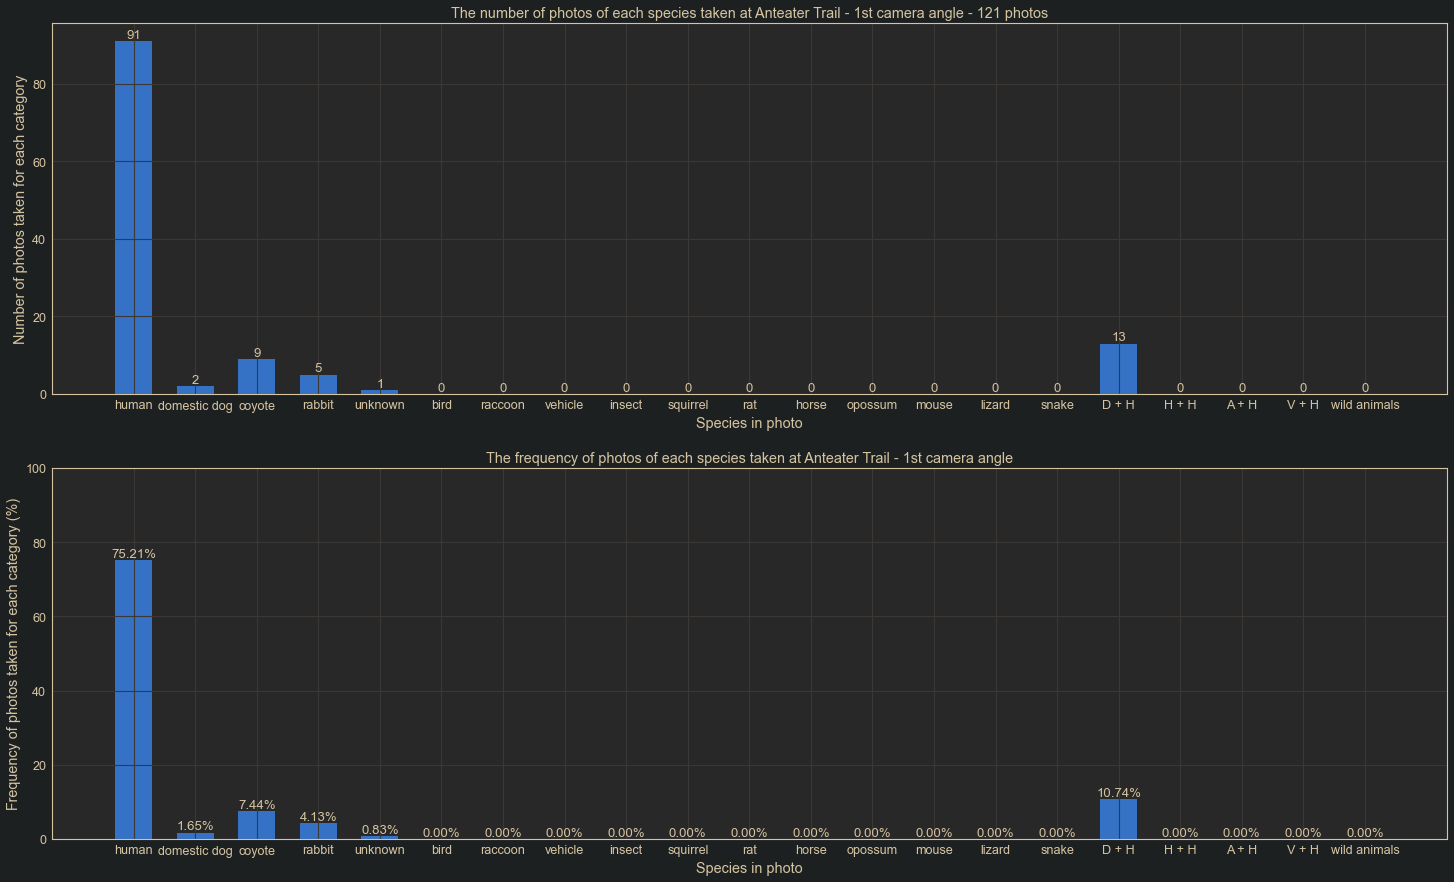

In [80]:
plotSpeciesDistribution(Anteater1_results, Anteater1_total, "Anteater Trail - 1st camera angle")

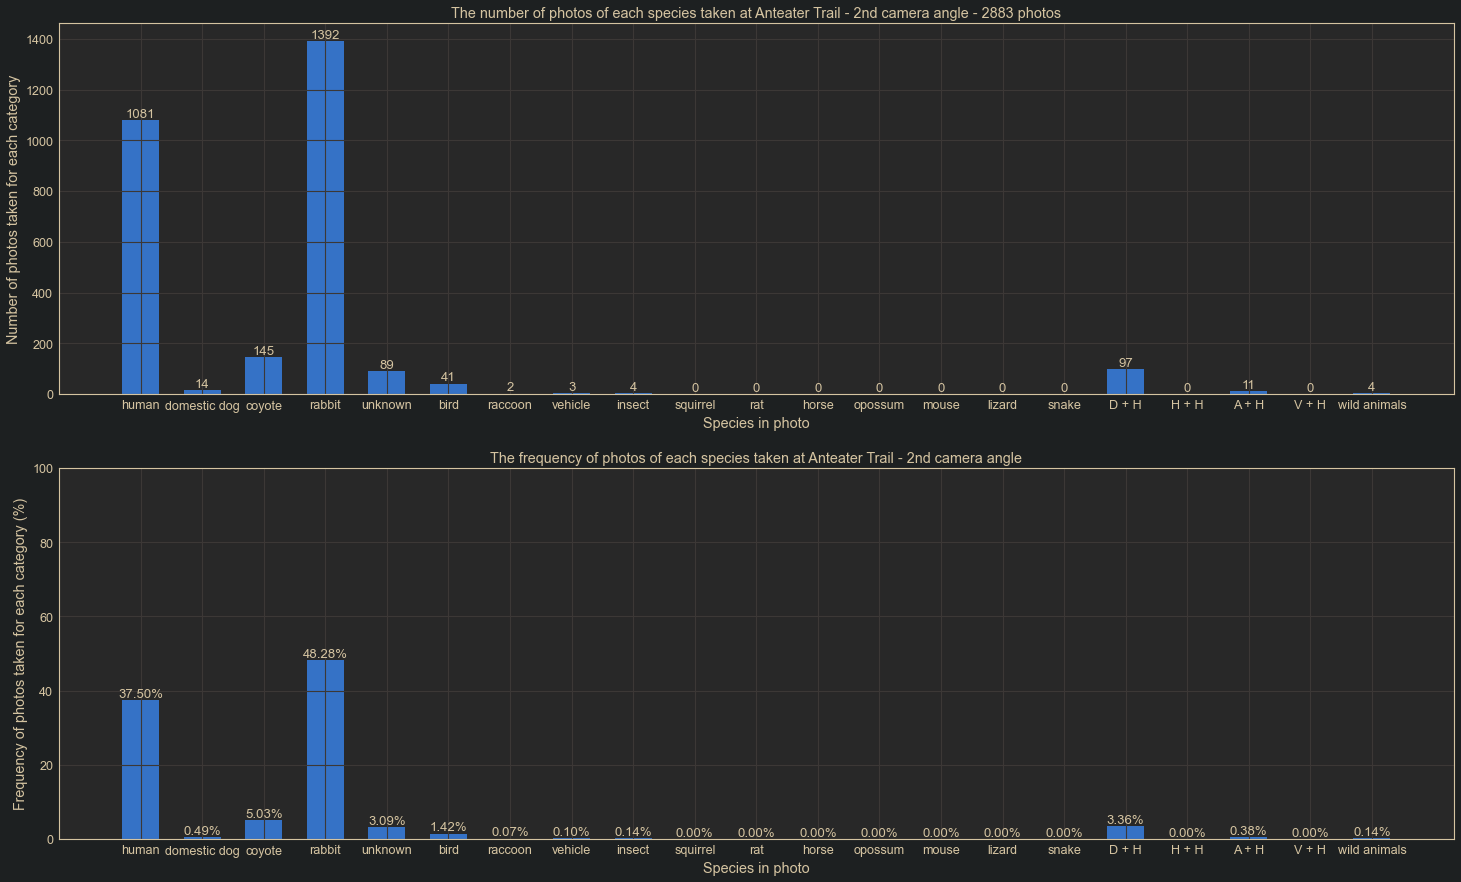

In [81]:
plotSpeciesDistribution(Anteater2_results, Anteater2_total, "Anteater Trail - 2nd camera angle")

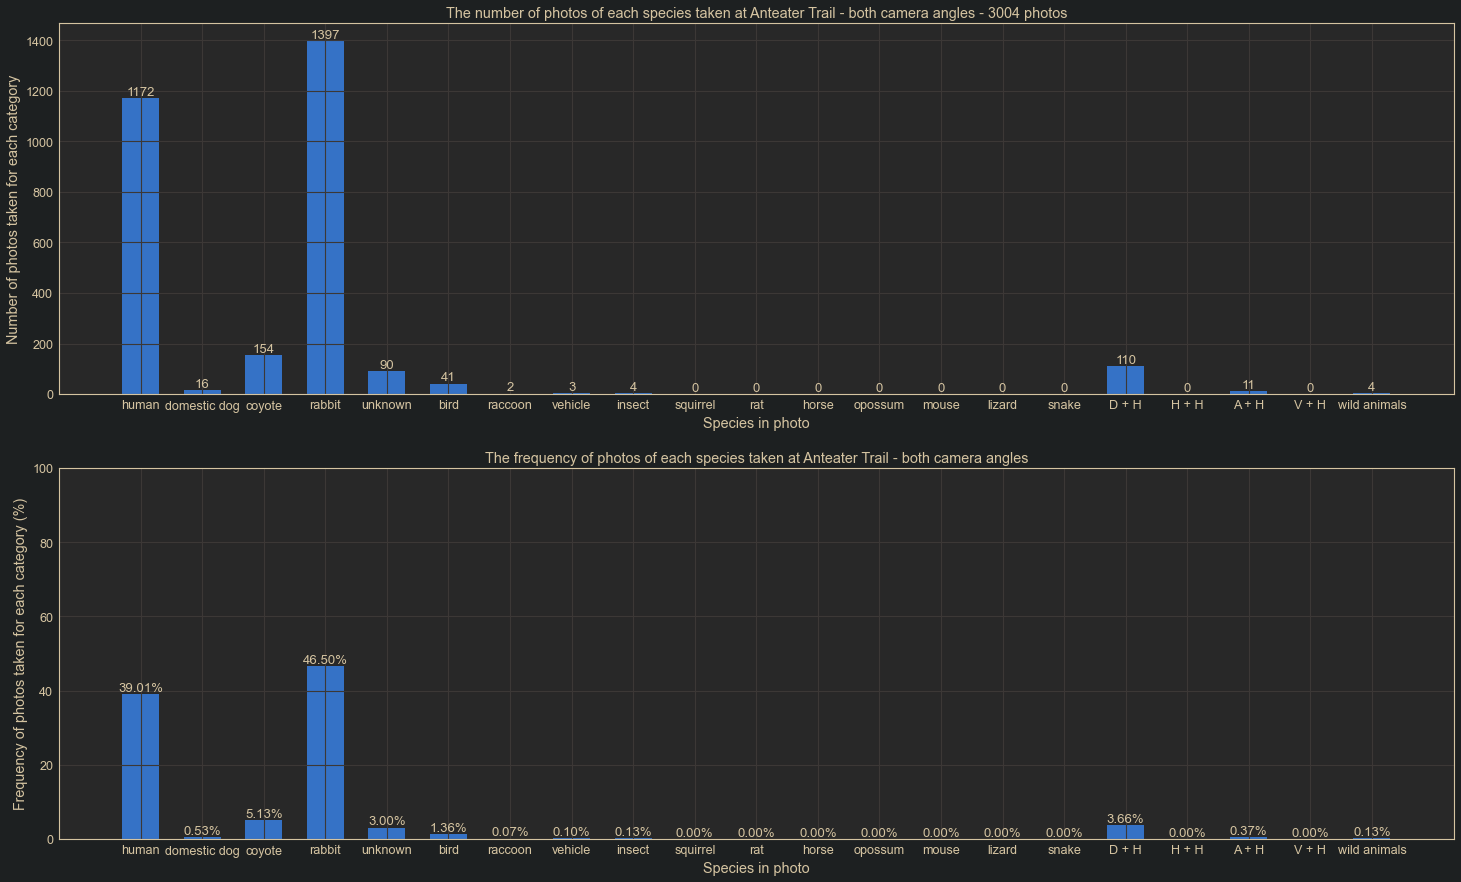

In [82]:
plotSpeciesDistribution(Anteater_results, Anteater_total, "Anteater Trail - both camera angles")

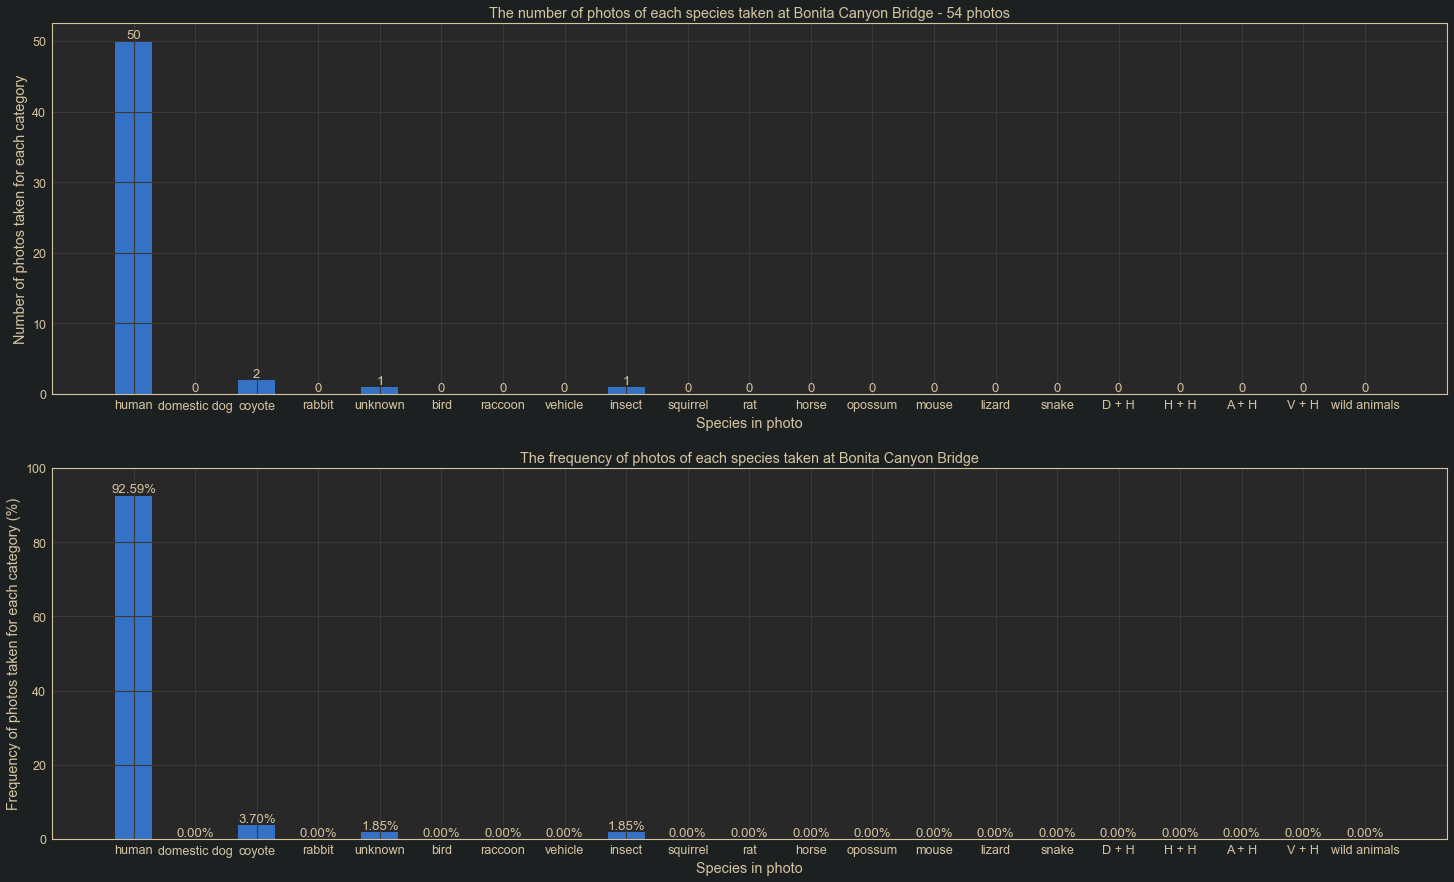

In [83]:
plotSpeciesDistribution(BonitaCanyonBridge_results, BonitaCanyonBridge_total, "Bonita Canyon Bridge")

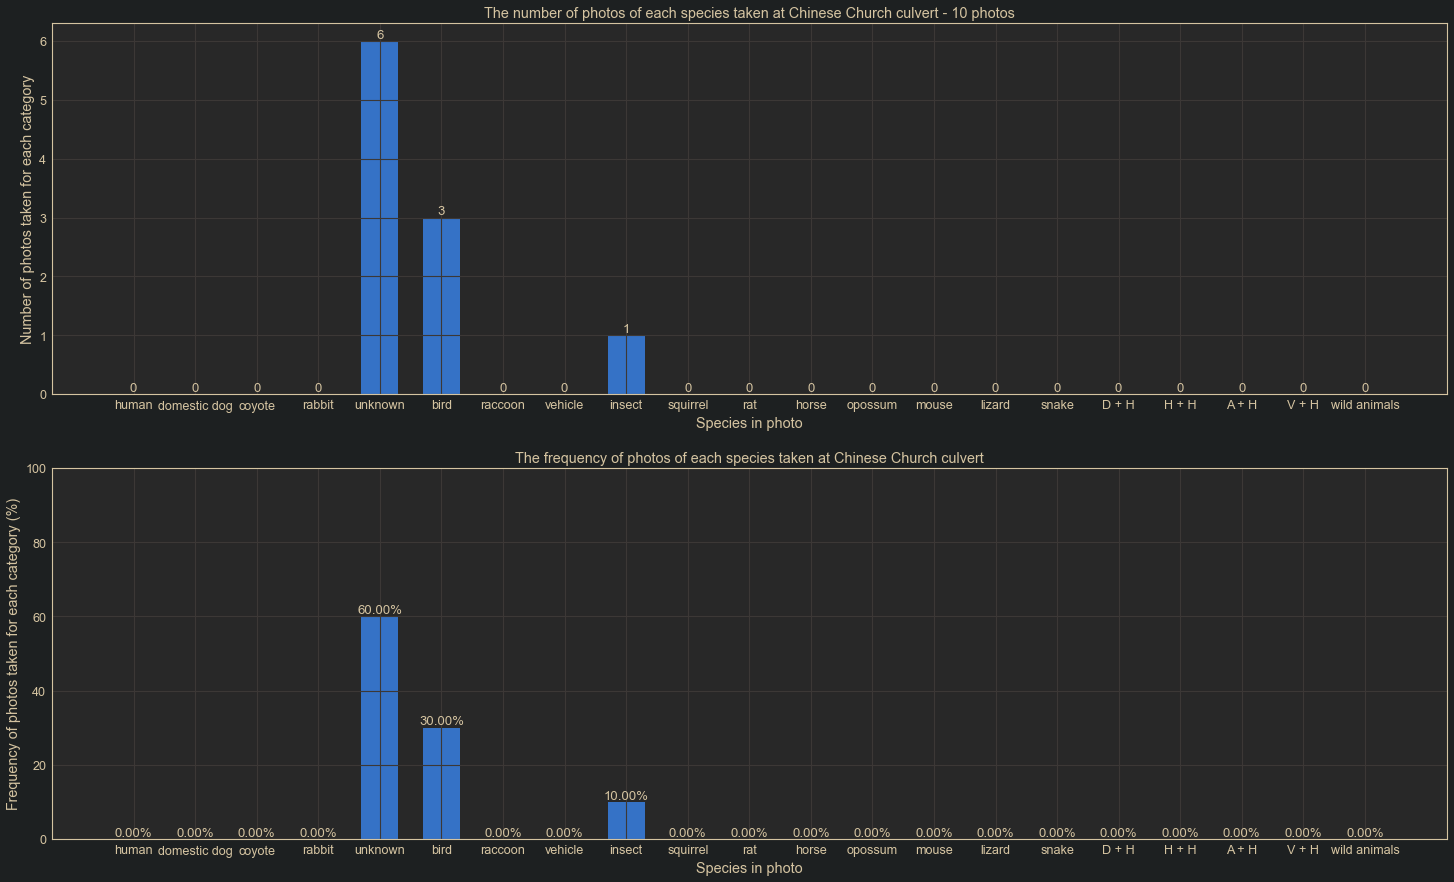

In [84]:
plotSpeciesDistribution(ChineseChurchCulvert_results, ChineseChurchCulvert_total, "Chinese Church culvert")

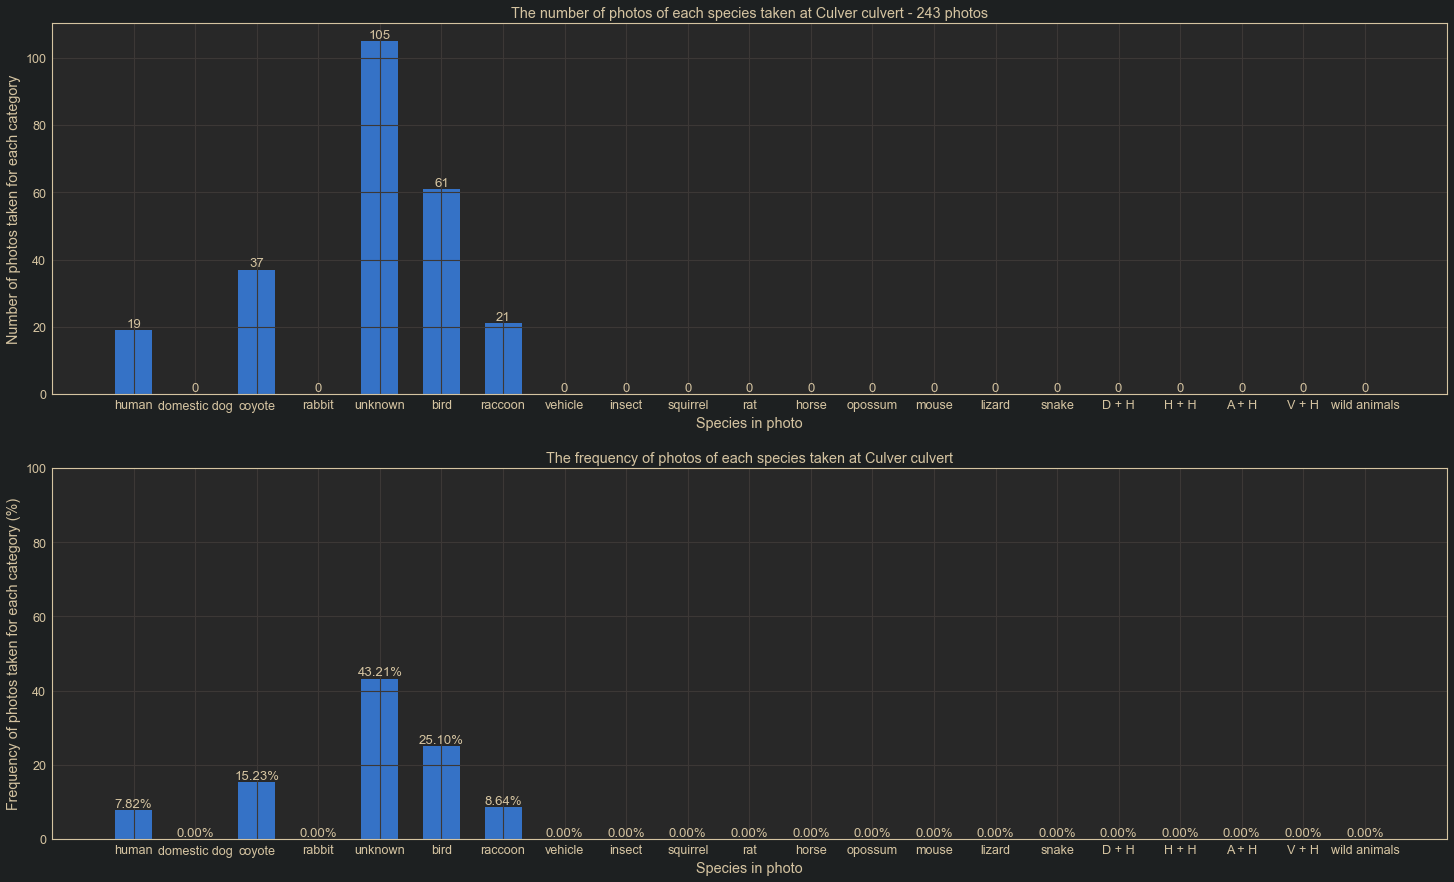

In [85]:
plotSpeciesDistribution(Culver_Culvert_results, Culver_Culvert_total, "Culver culvert")

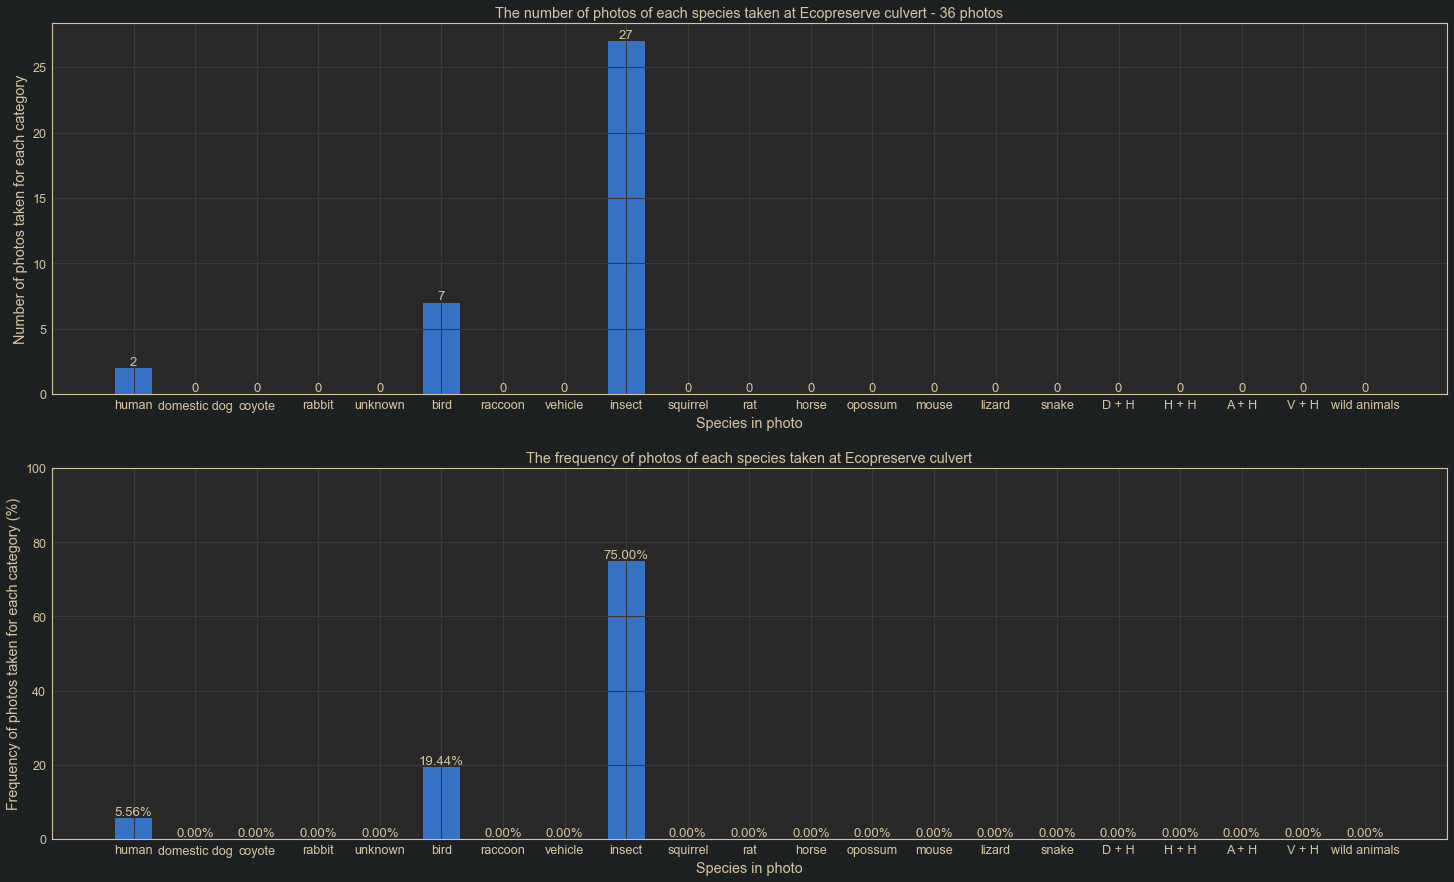

In [86]:
plotSpeciesDistribution(Ecopreserve_culvert_results, Ecopreserve_culvert_total, "Ecopreserve culvert")

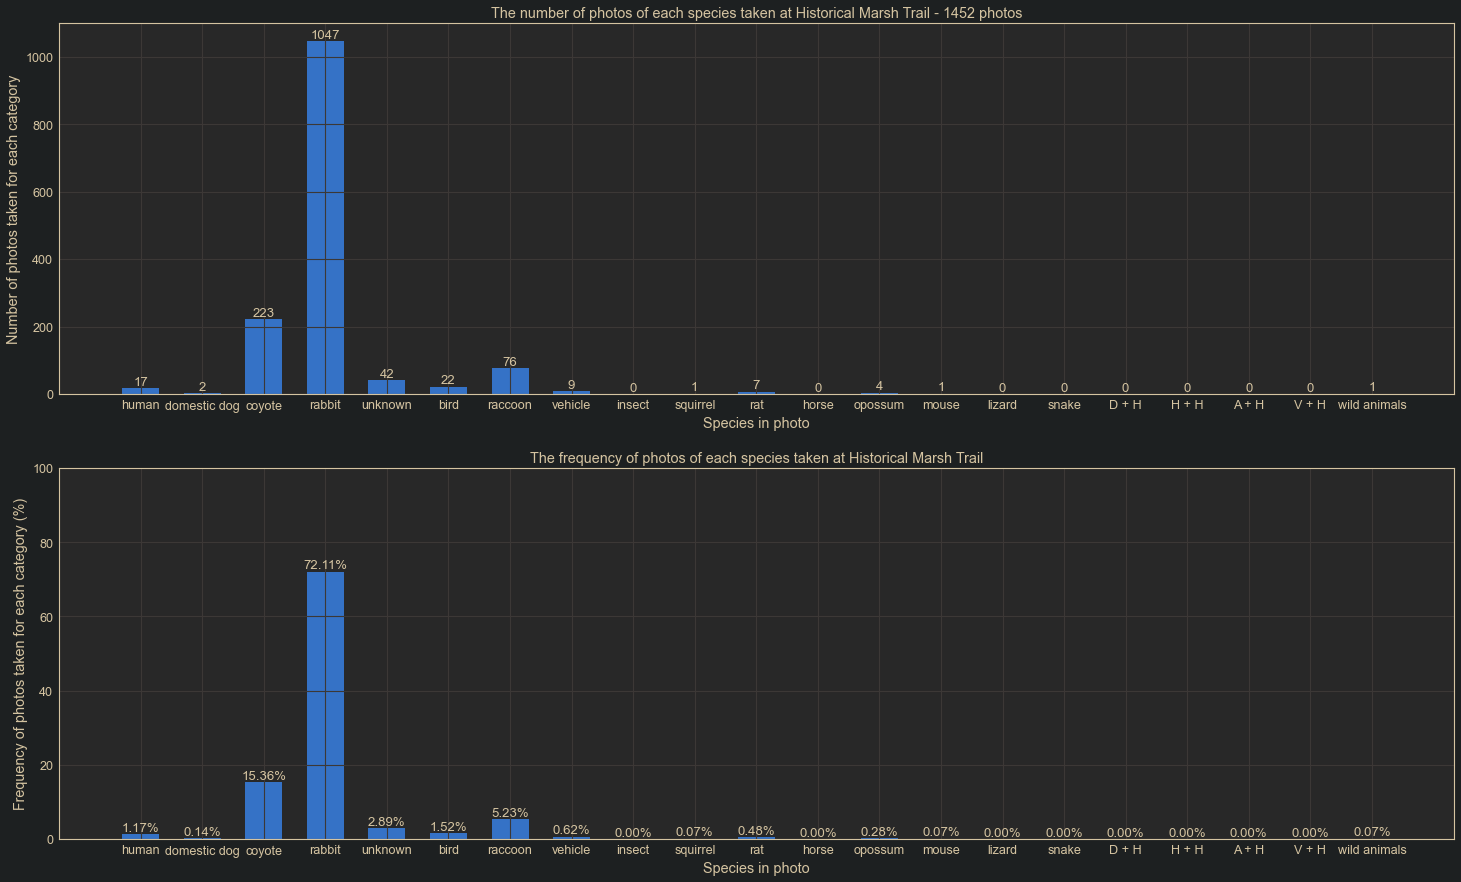

In [87]:
plotSpeciesDistribution(Historical_MarshTrail_results, Historical_MarshTrail_total, "Historical Marsh Trail")

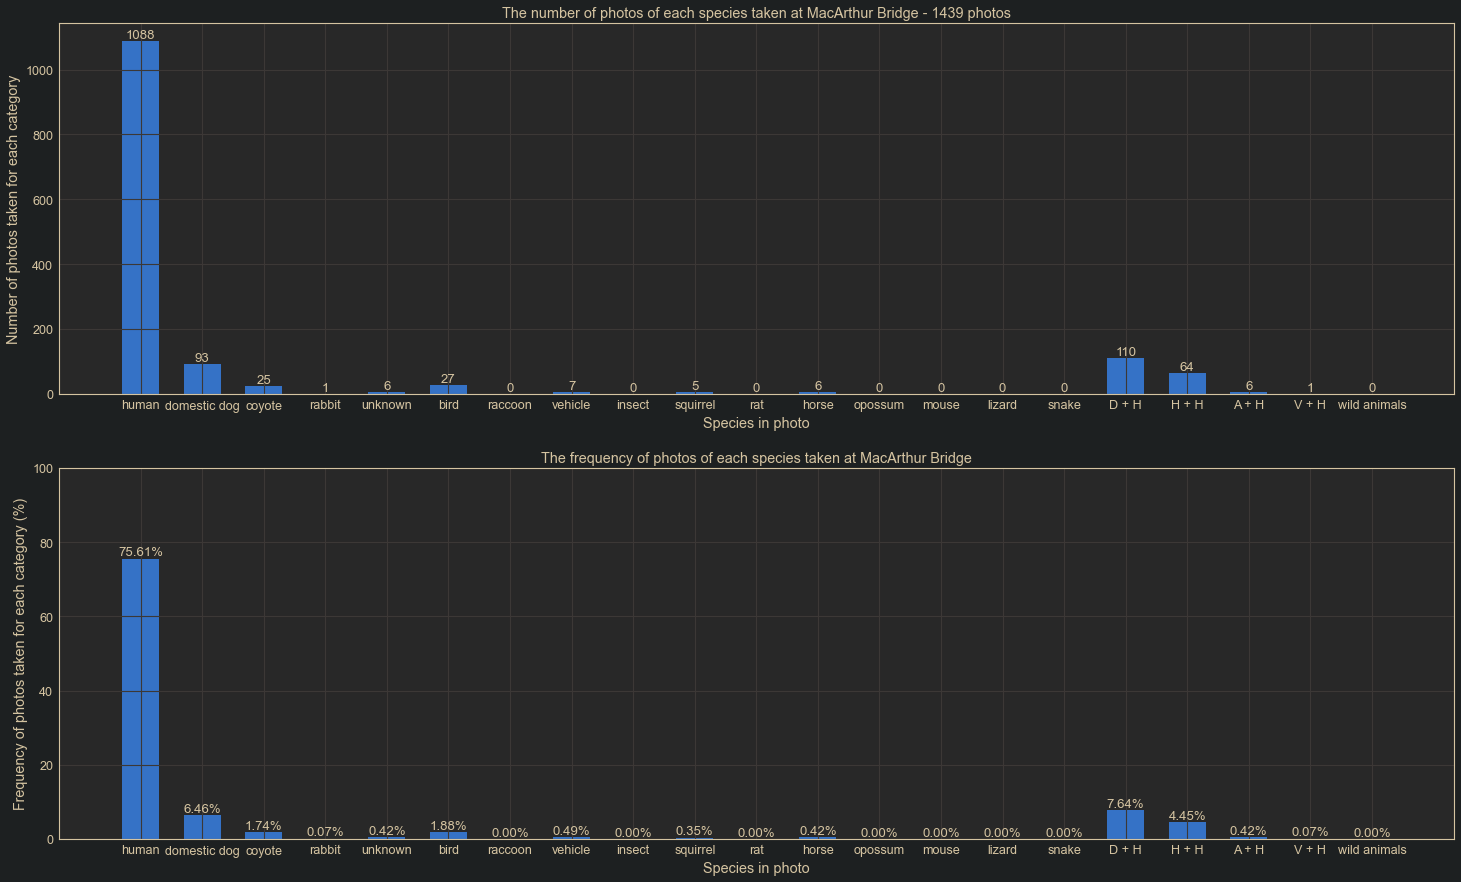

In [88]:
plotSpeciesDistribution(MacArthurBridge_results, MacArthurBridge_total, "MacArthur Bridge")

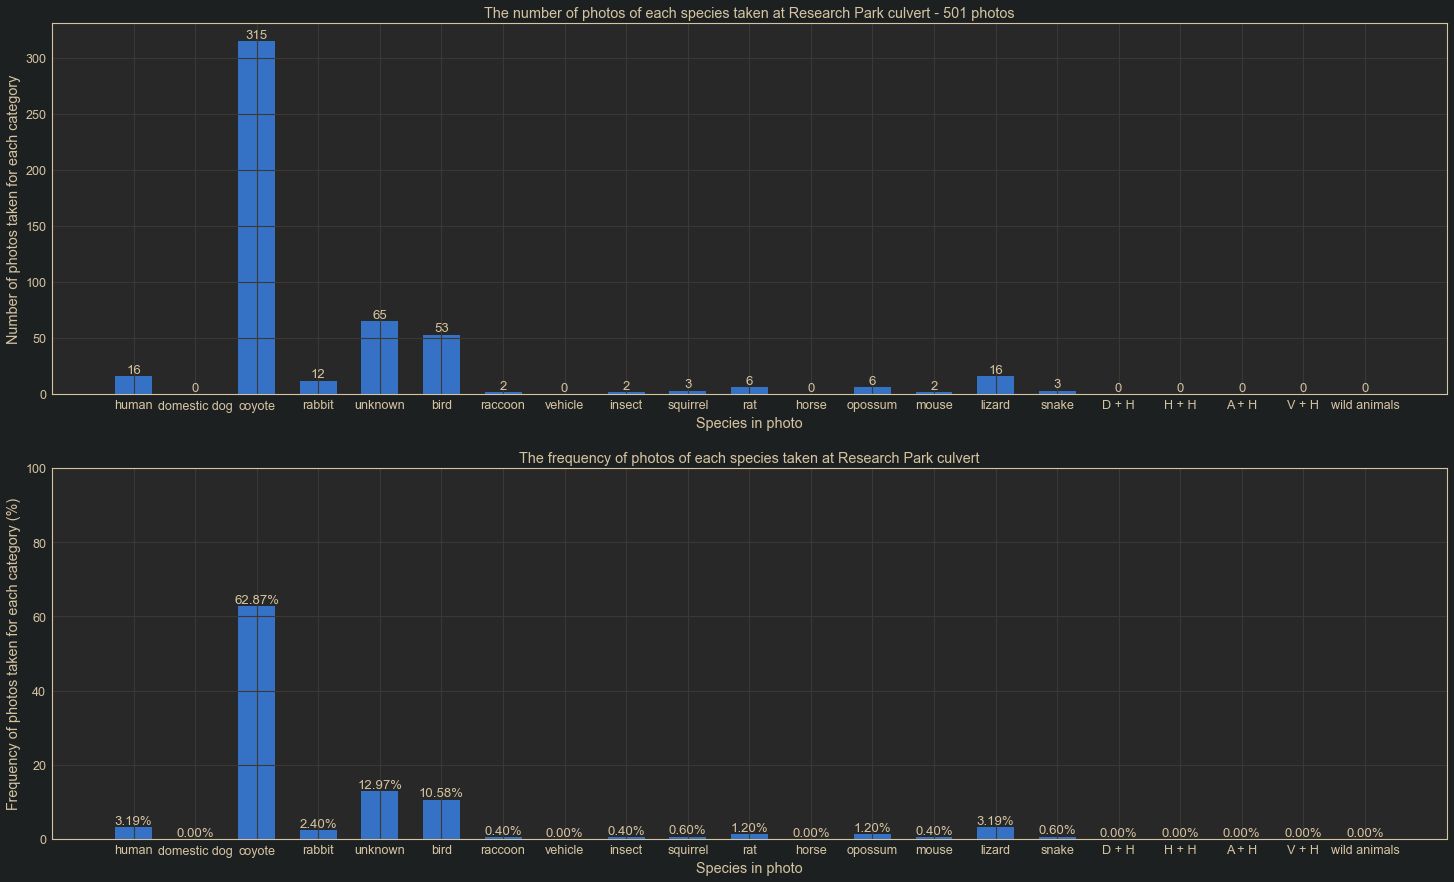

In [89]:
plotSpeciesDistribution(ResearchPark_Culvert_results, ResearchPark_Culvert_total, "Research Park culvert")

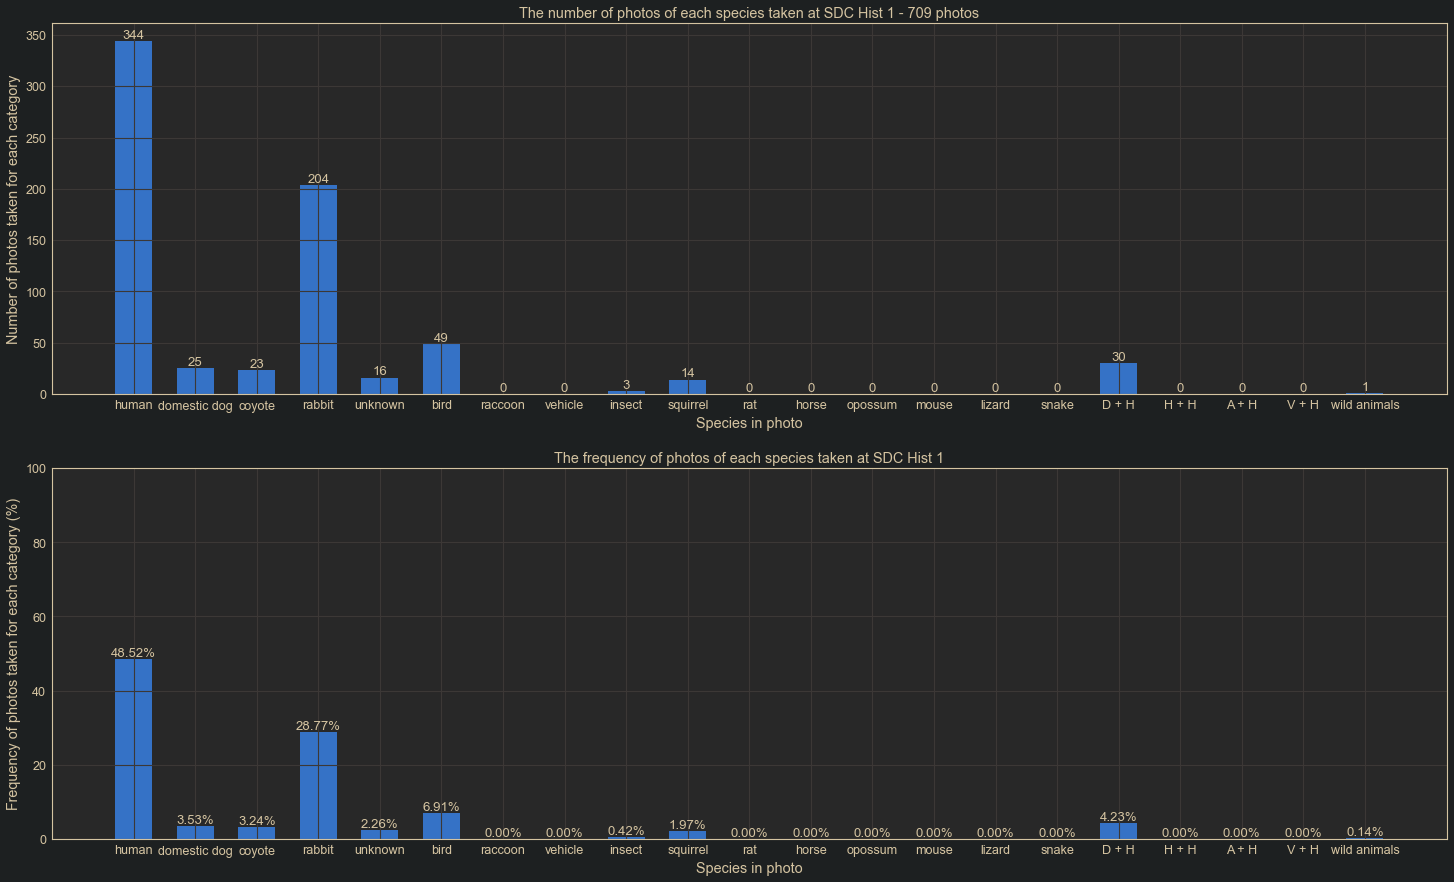

In [90]:
plotSpeciesDistribution(SDC_Hist_1_results, SDC_Hist_1_total, "SDC Hist 1")

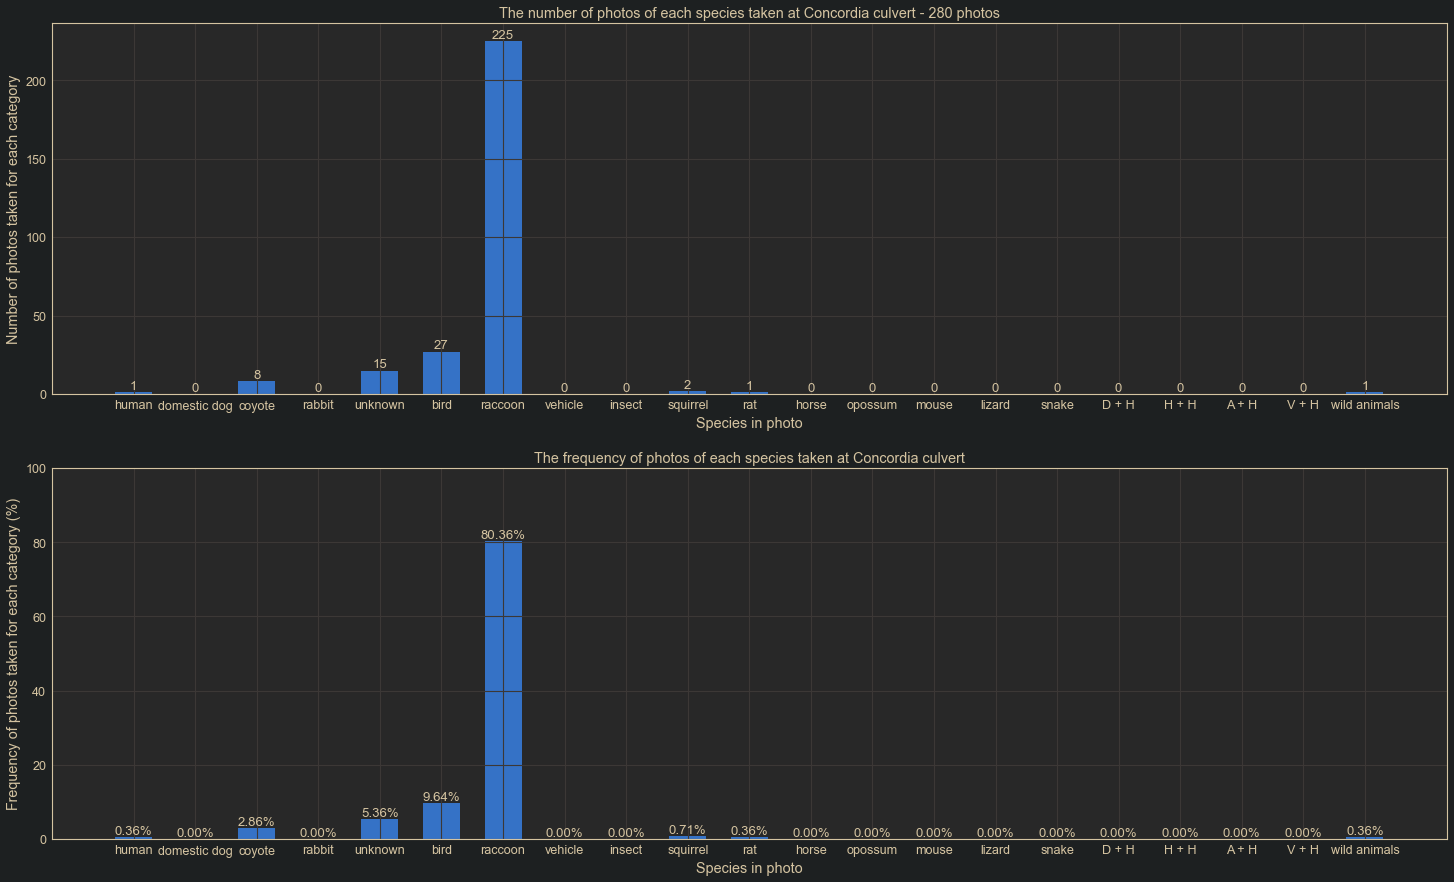

In [91]:
plotSpeciesDistribution(ConcordiaCulvert_results, ConcordiaCulvert_total, "Concordia culvert")

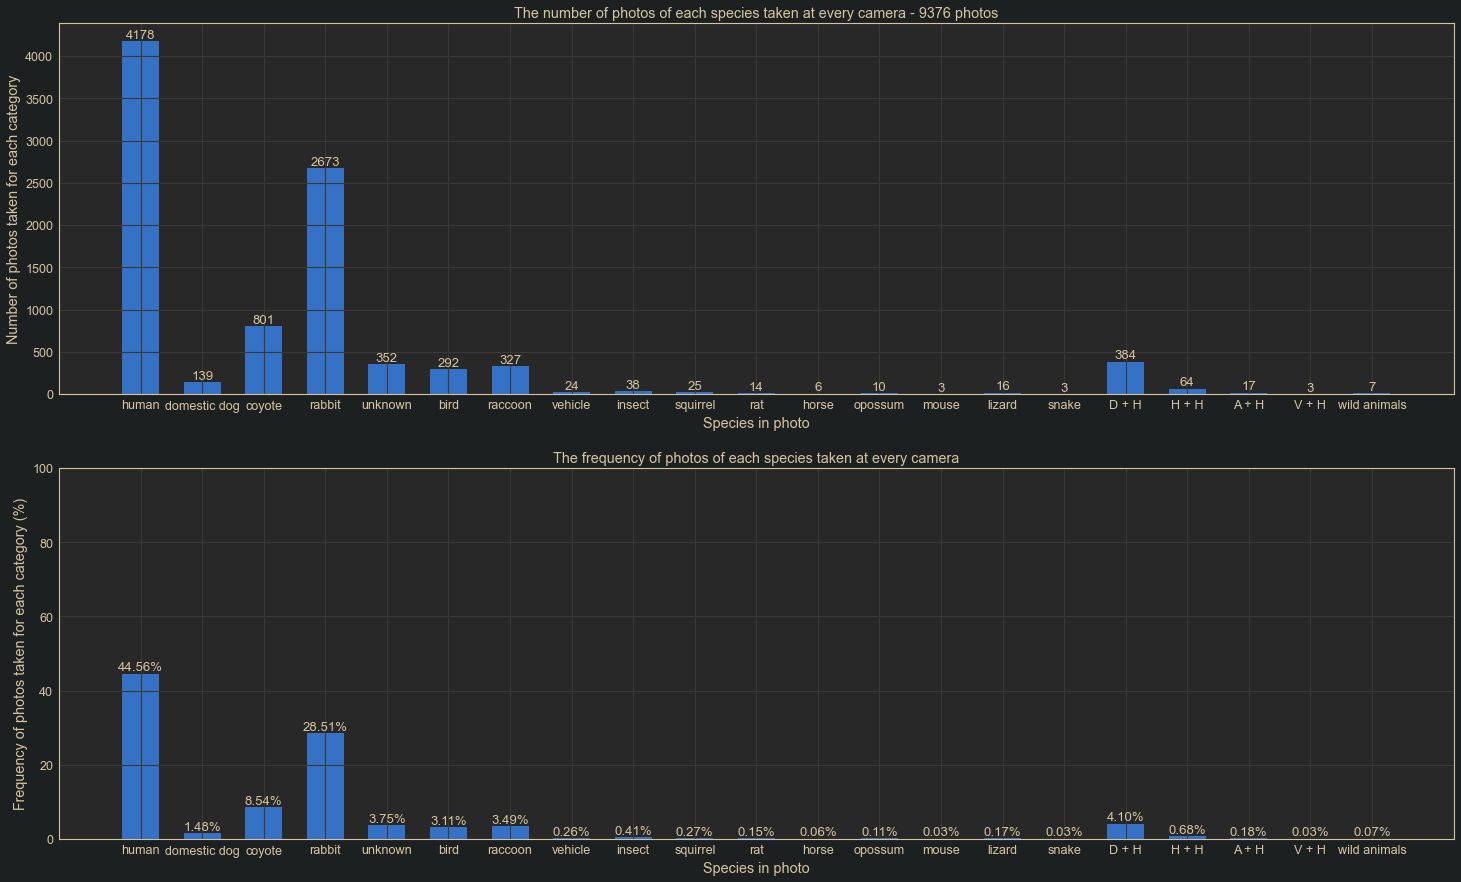

In [92]:
plotSpeciesDistribution(allPhotos_results, allPhotos_total, "every camera")

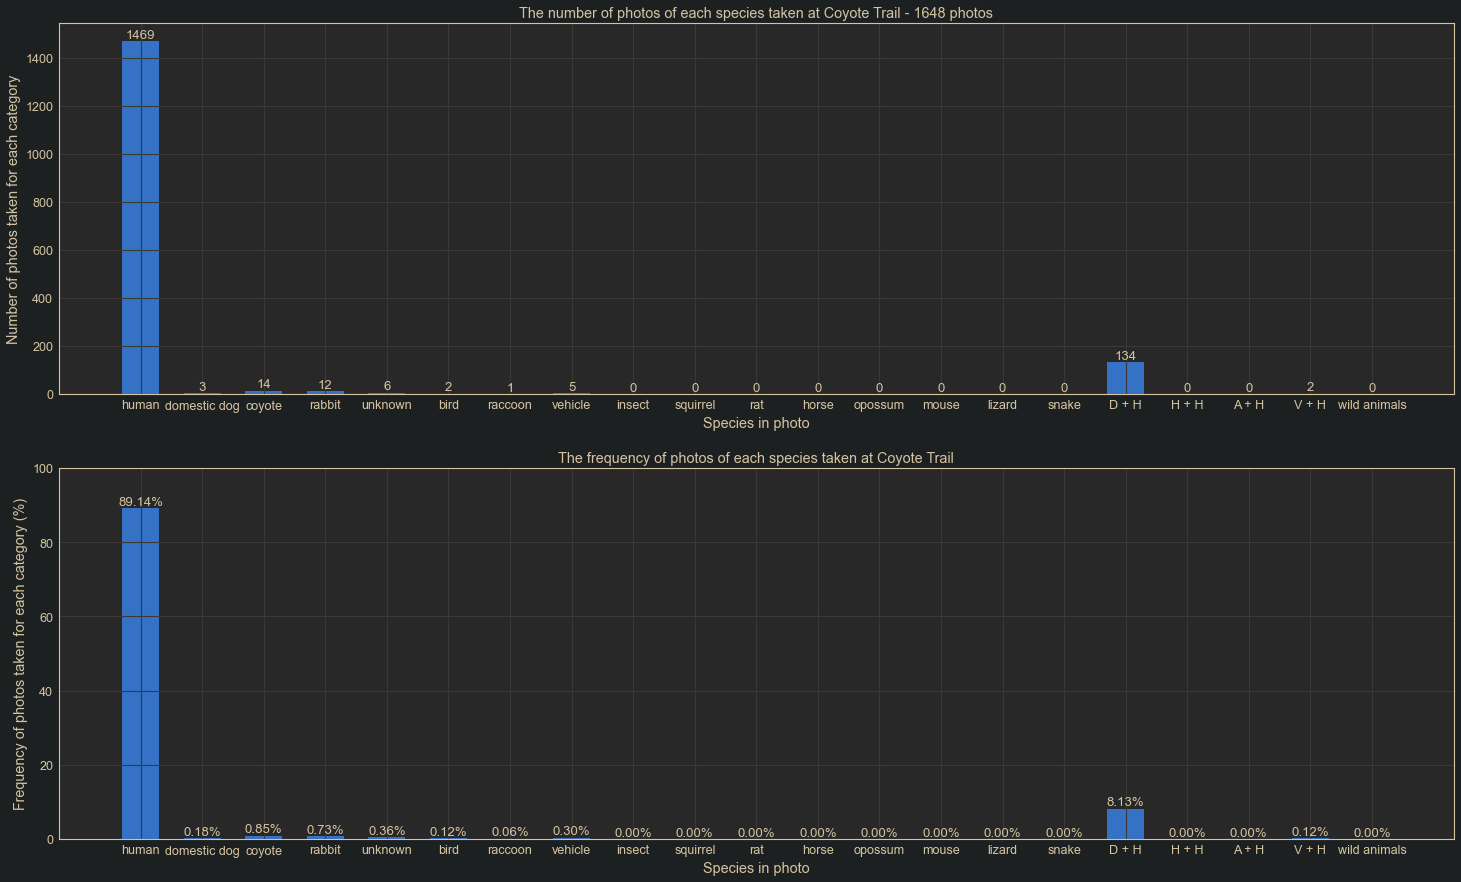

In [93]:
plotSpeciesDistribution(Coyotetrail_results, Coyotetrail_total, "Coyote Trail")

### Section 4

In [94]:
print(cameras)
totals = [Anteater_total, BonitaCanyonBridge_total, ChineseChurchCulvert_total, ConcordiaCulvert_total, Coyotetrail_total, Culver_Culvert_total, Ecopreserve_culvert_total, Historical_MarshTrail_total, MacArthurBridge_total, ResearchPark_Culvert_total, SDC_Hist_1_total]


['Anteater_1', 'Anteater_2', 'BonitaCanyonBridge', 'ChineseChurchCulvert', 'ConcordiaCulvert', 'Coyotetrail', 'Culver_Culvert', 'Ecopreserve_culvert', 'Historical_MarshTrail', 'MacArthurBridge', 'ResearchPark_Culvert', 'SDC_Hist_1']


In [95]:
cameras2 = ["Anteater camera"]
cameras2.extend(cameras[2:])
rankingDataFrame = pd.DataFrame({"Cameras": cameras2,
                                "Total photos": totals})
sortedDataFrame = rankingDataFrame.sort_values(by = "Total photos", ascending = False)
sortedDataFrame.to_csv("Total photos from each camera.csv", index = False)